#1-Preparation Data

1.2-Data Cleaning

In [1]:
import pandas as pd

# تحميل البيانات
df = pd.read_csv('/content/Reddit 9 posts dataset.csv')


# عرض بعض الصفوف لفهم البيانات
df.head()

,Post_URL,Author,Original_Comment,Cleaned_Comment,Score,Created_At,Hour_of_Day,Night_Post,Word_Count,Word_Length_Category,Sentiment_Score,Sentiment_Label,Subjectivity,Suicide_Risk
0,https://www.reddit.com/r/Advice/comments/1izle...,One_Maximum9683,"There is an old saying, ""You reap what you sow...",old saying reap sow means eventually face cons...,3169,2025-02-27 17:39:57,17,0,47,Very Long,-0.0869,Negative,0.525714,Low Risk
1,https://www.reddit.com/r/Advice/comments/1izle...,momistall,Your mom has to say that. She is a good mom fo...,mom say good mom making decision gut tells ask...,483,2025-02-27 17:46:01,17,0,21,Normal,-0.3022,Negative,0.400000,Low Risk
2,https://www.reddit.com/r/Advice/comments/1izle...,NaN,[deleted],deleted,128,2025-02-27 17:42:46,17,0,1,Very Short,0.0000,Neutral,0.000000,Minimal Concern
3,https://www.reddit.com/r/Advice/comments/1izle...,CuriousPenguinSocks,"Nope, the state will take care of him. He is b...",nope state take care basically stranger street...,276,2025-02-27 17:51:25,17,0,58,Very Long,0.9325,Positive,0.570139,Low Risk
4,https://www.reddit.com/r/Advice/comments/1izle...,cajunbabexo,No thanks.,thanks,112,2025-02-27 17:39:40,17,0,1,Very Short,0.4404,Positive,0.200000,Minimal Concern


In [2]:
print(df.columns)

Index(['Post_URL', 'Author', 'Original_Comment', 'Cleaned_Comment', 'Score',
       'Created_At', 'Hour_of_Day', 'Night_Post', 'Word_Count',
       'Word_Length_Category', 'Sentiment_Score', 'Sentiment_Label',
       'Subjectivity', 'Suicide_Risk'],
      dtype='object')


In [3]:
# تحويل النصوص إلى حروف صغيرة
df['Original_Comment'] = df['Original_Comment'].str.lower()

In [4]:
# إزالة الرموز غير الضرورية
import re

def clean_text(text):
    # إزالة الرموز الخاصة والأرقام
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['Original_Comment'] = df['Original_Comment'].apply(clean_text)


In [5]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:

# إزالة الكلمات التوقفية (stopwords)
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['Original_Comment'] = df['Original_Comment'].apply(remove_stopwords)

# عرض البيانات بعد التنظيف
print(df.head())

                                            Post_URL               Author  \
0  https://www.reddit.com/r/Advice/comments/1izle...      One_Maximum9683   
1  https://www.reddit.com/r/Advice/comments/1izle...            momistall   
2  https://www.reddit.com/r/Advice/comments/1izle...                  NaN   
3  https://www.reddit.com/r/Advice/comments/1izle...  CuriousPenguinSocks   
4  https://www.reddit.com/r/Advice/comments/1izle...          cajunbabexo   

                                    Original_Comment  \
0  old saying reap sow means eventually face cons...   
1  mom say good mom making decision gut tells ask...   
2                                            deleted   
3  nope state take care basically stranger street...   
4                                             thanks   

                                     Cleaned_Comment  Score  \
0  old saying reap sow means eventually face cons...   3169   
1  mom say good mom making decision gut tells ask...    483   
2          

In [7]:
# إضافة المزيد من الكلمات الغير مفيدة
useless_words = []
useless_words.extend([
    'nothing', 'everything', 'something', 'anything', 'none',
    'but', 'however', 'therefore', 'thus', 'because', 'as', 'since',
    'how', 'what', 'why', 'who', 'which', 'where', 'when', 'can', 'could', 'would',
    'shall', 'might', 'perhaps', 'maybe', 'probably', 'almost', 'actually', 'eventually',
    'basically', 'clearly', 'evidently', 'many', 'few', 'some', 'a lot', 'lots', 'lots of',
    'plenty', 'almost', 'little'
])

# دالة لإزالة الكلمات الغير مفيدة
def remove_useless_words(text):
    if isinstance(text, str):  # التأكد من أن القيمة نصية
        words = text.split()
        words = [word for word in words if word not in useless_words]
        return " ".join(words)
    return text  # إذا كانت القيمة ليست نصية، نعيدها كما هي

# تطبيق دالة التنظيف على العمود
df['Cleaned_Comment'] = df['Cleaned_Comment'].apply(remove_useless_words)

# عرض البيانات بعد التنظيف
df.head()


,Post_URL,Author,Original_Comment,Cleaned_Comment,Score,Created_At,Hour_of_Day,Night_Post,Word_Count,Word_Length_Category,Sentiment_Score,Sentiment_Label,Subjectivity,Suicide_Risk
0,https://www.reddit.com/r/Advice/comments/1izle...,One_Maximum9683,old saying reap sow means eventually face cons...,old saying reap sow means face consequences ac...,3169,2025-02-27 17:39:57,17,0,47,Very Long,-0.0869,Negative,0.525714,Low Risk
1,https://www.reddit.com/r/Advice/comments/1izle...,momistall,mom say good mom making decision gut tells ask...,mom say good mom making decision gut tells ask...,483,2025-02-27 17:46:01,17,0,21,Normal,-0.3022,Negative,0.400000,Low Risk
2,https://www.reddit.com/r/Advice/comments/1izle...,NaN,deleted,deleted,128,2025-02-27 17:42:46,17,0,1,Very Short,0.0000,Neutral,0.000000,Minimal Concern
3,https://www.reddit.com/r/Advice/comments/1izle...,CuriousPenguinSocks,nope state take care basically stranger street...,nope state take care stranger street share dna...,276,2025-02-27 17:51:25,17,0,58,Very Long,0.9325,Positive,0.570139,Low Risk
4,https://www.reddit.com/r/Advice/comments/1izle...,cajunbabexo,thanks,thanks,112,2025-02-27 17:39:40,17,0,1,Very Short,0.4404,Positive,0.200000,Minimal Concern


In [8]:
# التأكد من أن القيم ليست NaN أو من نوع غير نصي
df['Cleaned_Comment'] = df['Cleaned_Comment'].fillna('')  # تحويل القيم NaN إلى سلاسل فارغة

# حساب عدد الحروف فقط للنصوص
df['Char_Count'] = df['Cleaned_Comment'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)

# عرض البيانات مع عدد الحروف
df[['Cleaned_Comment', 'Char_Count']].head()


,Cleaned_Comment,Char_Count
0,old saying reap sow means face consequences ac...,274
1,mom say good mom making decision gut tells ask...,125
2,deleted,7
3,nope state take care stranger street share dna...,337
4,thanks,6


In [9]:
# حساب عدد الكلمات وعدد الحروف قبل التنظيف
df['Word_Count_Before'] = df['Original_Comment'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)
df['Char_Count_Before'] = df['Original_Comment'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)

# تطبيق إزالة الكلمات الغير مفيدة
df['Cleaned_Comment'] = df['Cleaned_Comment'].apply(remove_useless_words)

# حساب عدد الكلمات وعدد الحروف بعد التنظيف
df['Word_Count_After'] = df['Cleaned_Comment'].apply(lambda x: len(str(x).split()) if isinstance(x, str) else 0)
df['Char_Count_After'] = df['Cleaned_Comment'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)

# عرض الإحصائيات للمقارنة
df_comparison = df[['Word_Count_Before', 'Word_Count_After', 'Char_Count_Before', 'Char_Count_After']].head()

df_comparison


,Word_Count_Before,Word_Count_After,Char_Count_Before,Char_Count_After
0,46,43,304,274
1,21,20,131,125
2,1,1,7,7
3,58,54,369,337
4,1,1,6,6


In [10]:
df['Cleaned_Comment'] = df['Cleaned_Comment'].str.strip()  # إزالة الفراغات في البداية والنهاية
df['Cleaned_Comment'] = df['Cleaned_Comment'].str.replace(r'\s+', ' ', regex=True)  # إزالة الفراغات المتتالية


In [11]:
df['Cleaned_Comment'] = df['Cleaned_Comment'].apply(lambda x: x.lower())  # تحويل النصوص إلى lowercase


In [12]:
!pip install pyspellchecker


In [13]:
from spellchecker import SpellChecker
spell = SpellChecker()

def correct_spelling(text):
    words = text.split()
    corrected_words = [spell.correction(word) if spell.correction(word) is not None else word for word in words]
    return " ".join(corrected_words)

df['Cleaned_Comment'] = df['Cleaned_Comment'].apply(correct_spelling)


In [14]:
# حفظ البيانات المعدلة في ملف CSV جديد
df.to_csv("Cleaned_Reddit_Posts.csv", index=False)


In [15]:
import pandas as pd
from nltk.stem import PorterStemmer

# قراءة الملف المحفوظ مسبقًا
df = pd.read_csv("Cleaned_Reddit_Posts.csv")

# تطبيق التجذير
stemmer = PorterStemmer()

def apply_stemming(text):
    if isinstance(text, str):  # التأكد من أن القيمة نصية
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        return " ".join(stemmed_words)
    return text  # إذا كانت القيمة ليست نصية، نعيدها كما هي

# تطبيق دالة التجذير على العمود 'Cleaned_Comment'
df['Cleaned_Comment'] = df['Cleaned_Comment'].apply(apply_stemming)

# عرض البيانات بعد تطبيق التجذير
df.head()

,Post_URL,Author,Original_Comment,Cleaned_Comment,Score,Created_At,Hour_of_Day,Night_Post,Word_Count,Word_Length_Category,Sentiment_Score,Sentiment_Label,Subjectivity,Suicide_Risk,Char_Count,Word_Count_Before,Char_Count_Before,Word_Count_After,Char_Count_After
0,https://www.reddit.com/r/Advice/comments/1izle...,One_Maximum9683,old saying reap sow means eventually face cons...,old say reap sow mean face consequ action simp...,3169,2025-02-27 17:39:57,17,0,47,Very Long,-0.0869,Negative,0.525714,Low Risk,274,46,304,43,274
1,https://www.reddit.com/r/Advice/comments/1izle...,momistall,mom say good mom making decision gut tells ask...,mom say good mom make decis gut tell ask regre...,483,2025-02-27 17:46:01,17,0,21,Normal,-0.3022,Negative,0.400000,Low Risk,125,21,131,20,125
2,https://www.reddit.com/r/Advice/comments/1izle...,NaN,deleted,delet,128,2025-02-27 17:42:46,17,0,1,Very Short,0.0000,Neutral,0.000000,Minimal Concern,7,1,7,1,7
3,https://www.reddit.com/r/Advice/comments/1izle...,CuriousPenguinSocks,nope state take care basically stranger street...,nope state take care stranger street share na ...,276,2025-02-27 17:51:25,17,0,58,Very Long,0.9325,Positive,0.570139,Low Risk,337,58,369,54,337
4,https://www.reddit.com/r/Advice/comments/1izle...,cajunbabexo,thanks,thank,112,2025-02-27 17:39:40,17,0,1,Very Short,0.4404,Positive,0.200000,Minimal Concern,6,1,6,1,6


In [16]:
import string
stemmer = PorterStemmer()

def apply_stemming(text):
    if isinstance(text, str):  # التأكد من أن القيمة نصية
        words = text.split()
        stemmed_words = [stemmer.stem(word) for word in words]
        return " ".join(stemmed_words)
    return text  # إذا كانت القيمة ليست نصية، نعيدها كما هي

# دالة لتنظيف النصوص:
def clean_text(text):
    if isinstance(text, str):
        # تحويل النص إلى حروف صغيرة
        text = text.lower()
        # إزالة علامات الترقيم
        text = text.translate(str.maketrans('', '', string.punctuation))
        return text
    return text

# تنظيف الأعمدة التي تحتوي على نصوص
df['Post_URL'] = df['Post_URL'].apply(clean_text)
df['Author'] = df['Author'].apply(clean_text)
df['Original_Comment'] = df['Original_Comment'].apply(clean_text)

# تطبيق دالة التجذير على العمود 'Cleaned_Comment'
df['Cleaned_Comment'] = df['Cleaned_Comment'].apply(apply_stemming)

# إزالة القيم الفارغة أو المفقودة إذا كانت موجودة
df.dropna(subset=['Post_URL', 'Author', 'Original_Comment', 'Cleaned_Comment'], inplace=True)

# عرض البيانات بعد تنظيفها
df.head()

,Post_URL,Author,Original_Comment,Cleaned_Comment,Score,Created_At,Hour_of_Day,Night_Post,Word_Count,Word_Length_Category,Sentiment_Score,Sentiment_Label,Subjectivity,Suicide_Risk,Char_Count,Word_Count_Before,Char_Count_Before,Word_Count_After,Char_Count_After
0,httpswwwredditcomradvicecomments1izle46mydadle...,onemaximum9683,old saying reap sow means eventually face cons...,old say reap sow mean face consequ action simp...,3169,2025-02-27 17:39:57,17,0,47,Very Long,-0.0869,Negative,0.525714,Low Risk,274,46,304,43,274
1,httpswwwredditcomradvicecomments1izle46mydadle...,momistall,mom say good mom making decision gut tells ask...,mom say good mom make deci gut tell ask regret...,483,2025-02-27 17:46:01,17,0,21,Normal,-0.3022,Negative,0.400000,Low Risk,125,21,131,20,125
3,httpswwwredditcomradvicecomments1izle46mydadle...,curiouspenguinsocks,nope state take care basically stranger street...,nope state take care stranger street share na ...,276,2025-02-27 17:51:25,17,0,58,Very Long,0.9325,Positive,0.570139,Low Risk,337,58,369,54,337
4,httpswwwredditcomradvicecomments1izle46mydadle...,cajunbabexo,thanks,thank,112,2025-02-27 17:39:40,17,0,1,Very Short,0.4404,Positive,0.200000,Minimal Concern,6,1,6,1,6
5,httpswwwredditcomradvicecomments1izle46mydadle...,blackjeepw1,dad thing got phone call today would laugh lon...,dad thing 7 got phone call today laugh long lo...,117,2025-02-27 17:45:30,17,0,18,Normal,0.0772,Positive,0.575000,Low Risk,94,17,98,17,94


In [17]:
df.info

<bound method DataFrame.info of                                                Post_URL               Author  \
0     httpswwwredditcomradvicecomments1izle46mydadle...       onemaximum9683   
1     httpswwwredditcomradvicecomments1izle46mydadle...            momistall   
3     httpswwwredditcomradvicecomments1izle46mydadle...  curiouspenguinsocks   
4     httpswwwredditcomradvicecomments1izle46mydadle...          cajunbabexo   
5     httpswwwredditcomradvicecomments1izle46mydadle...          blackjeepw1   
...                                                 ...                  ...   
9895  httpswwwredditcomrnihilismcomments1i735mwiwant...             jatski23   
9896  httpswwwredditcomrnihilismcomments1i735mwiwant...      psionisardemons   
9897  httpswwwredditcomrnihilismcomments1i735mwiwant...      psionisardemons   
9898  httpswwwredditcomrnihilismcomments1i735mwiwant...       friendlyfun640   
9899  httpswwwredditcomrnihilismcomments1i735mwiwant...        anaxagoras126   

                                       Original_Comment  \
0     old saying reap sow means eventually face cons...   
1     mom say good mom making decision gut tells ask...   
3     nope state take care basically stranger street...   
4                                                thanks   
5     dad thing got phone call today would laugh lon...   
...                                                 ...   
9895                                                way   
9896                                    thank need much   
9897  happy heck realization isnt dont know comes ne...   
9898                      thank sure keep posted friend   
9899  realize looking two eyes eternal beautifully m...   

                                        Cleaned_Comment  Score  \
0     old say reap sow mean face consequ action simp...   3169   
1     mom say good mom make deci gut tell ask regret...    483   
3     nope state take care stranger street share na ...    276   
4                                                 thank    112   
5     dad thing 7 got phone call today laugh long lo...    117   
...                                                 ...    ...   
9895                                                way      3   
9896                                    thank need much      2   
9897  happi heck realiz isn't don't know come next b...      3   
9898                        thank sure keep post friend      2   
9899  realiz look two eye etern beauti mysteri word ...      2   

               Created_At  Hour_of_Day  Night_Post  Word_Count  \
0     2025-02-27 17:39:57           17           0          47   
1     2025-02-27 17:46:01           17           0          21   
3     2025-02-27 17:51:25           17           0          58   
4     2025-02-27 17:39:40           17           0           1   
5     2025-02-27 17:45:30           17           0          18   
...                   ...          ...         ...         ...   
9895  2025-01-22 22:20:40           22           1           1   
9896  2025-01-23 00:09:31            0           1           3   
9897  2025-01-23 00:08:20            0           1          42   
9898  2025-01-23 00:11:33            0           1           5   
9899  2025-01-26 05:41:57            5           1          12   

     Word_Length_Category  Sentiment_Score Sentiment_Label  Subjectivity  \
0               Very Long          -0.0869        Negative      0.525714   
1                  Normal          -0.3022        Negative      0.400000   
3               Very Long           0.9325        Positive      0.570139   
4              Very Short           0.4404        Positive      0.200000   
5                  Normal           0.0772        Positive      0.575000   
...                   ...              ...             ...           ...   
9895           Very Short           0.0000         Neutral      0.000000   
9896           Very Short           0.3612        Positive      0.200000   
9897            Very Long   

In [18]:
df.to_csv("Cleaned_Stemmed_Reddit_Posts.csv", index=False)

1.3-Initial Exploration

In [19]:
!pip install nltk wordcloud matplotlib


In [20]:
!pip install wordcloud


In [21]:
import pandas as pd
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

In [22]:
df = pd.read_csv("Cleaned_Stemmed_Reddit_Posts.csv")


In [23]:
import pandas as pd

# تحميل الداتا من CSV أو أي مصدر تاني
# df = pd.read_csv('your_file.csv')

# تحويل Created_At لتاريخ ووقت
df['Created_At'] = pd.to_datetime(df['Created_At'])

# تحويل التصنيفات الرقمية
df['Score'] = df['Score'].astype(int)
df['Hour_of_Day'] = df['Hour_of_Day'].astype(int)
df['Night_Post'] = df['Night_Post'].astype(int)
df['Word_Count'] = df['Word_Count'].astype(int)
df['Sentiment_Score'] = df['Sentiment_Score'].astype(float)
df['Subjectivity'] = df['Subjectivity'].astype(float)
df['Char_Count'] = df['Char_Count'].astype(int)
df['Word_Count_Before'] = df['Word_Count_Before'].astype(int)
df['Char_Count_Before'] = df['Char_Count_Before'].astype(int)
df['Word_Count_After'] = df['Word_Count_After'].astype(int)
df['Char_Count_After'] = df['Char_Count_After'].astype(int)

# ترميز Suicide_Risk
risk_mapping = {'Low Risk': 0, 'Moderate Risk': 1, 'High Risk': 2}
df['Suicide_Risk'] = df['Suicide_Risk'].map(risk_mapping)

# باقي الأعمدة تفضل نصية أو category حسب استخدامك
df['Post_URL'] = df['Post_URL'].astype(str)
df['Author'] = df['Author'].astype(str)
df['Original_Comment'] = df['Original_Comment'].astype(str)
df['Cleaned_Comment'] = df['Cleaned_Comment'].astype(str)
df['Word_Length_Category'] = df['Word_Length_Category'].astype('category')
df['Sentiment_Label'] = df['Sentiment_Label'].astype('category')


In [24]:

# التأكد من تحميل NLTK للمرة الأولى
nltk.download('vader_lexicon')
nltk.download('punkt')

# 1. تحليل المشاعر (Sentiment Analysis)
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
# إضافة عمود Sentiment_Score و Sentiment_Label
df['Sentiment_Score'] = df['Cleaned_Comment'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

In [26]:

# 2. تصورات (Word Cloud)
all_comments = ' '.join(df['Cleaned_Comment'].dropna())  # دمج جميع التعليقات في نص واحد
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)


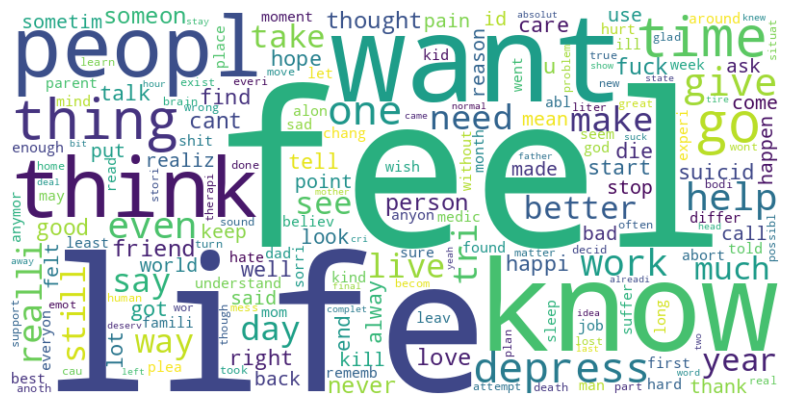

In [27]:

# عرض word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [28]:
# 3. Bar Charts لتوزيع المشاعر
sentiment_counts = df['Sentiment_Label'].value_counts()


In [29]:
print(df['Suicide_Risk'].head(10))


0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    NaN
6    0.0
7    NaN
8    NaN
9    0.0
Name: Suicide_Risk, dtype: float64


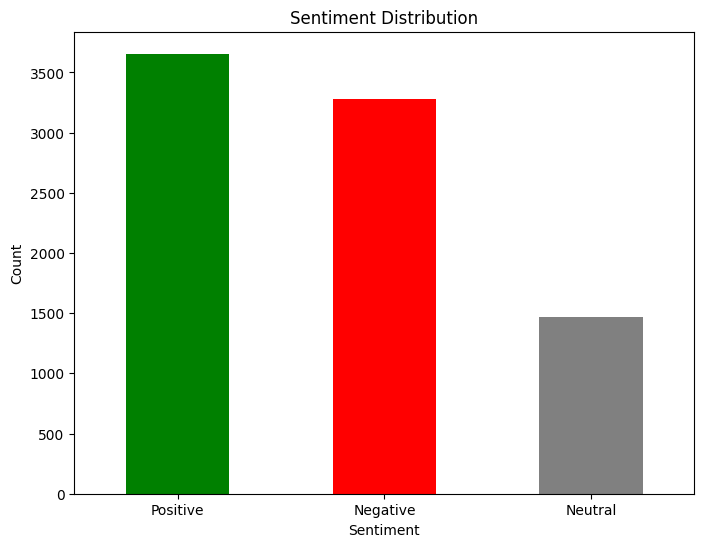

In [30]:
# رسم Bar Chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [31]:
# عرض بعض النتائج للتأكد
print(df[['Cleaned_Comment', 'Sentiment_Score', 'Sentiment_Label']].head())

                                     Cleaned_Comment  Sentiment_Score  \
0  old say reap sow mean face consequ action simp...          -0.5423   
1  mom say good mom make deci gut tell ask regret...          -0.3670   
2  nope state take care stranger street share na ...           0.9578   
3                                              thank           0.3612   
4  dad thing 7 got phone call today laugh long lo...           0.5574   

  Sentiment_Label  
0        Negative  
1        Negative  
2        Positive  
3        Positive  
4        Positive  


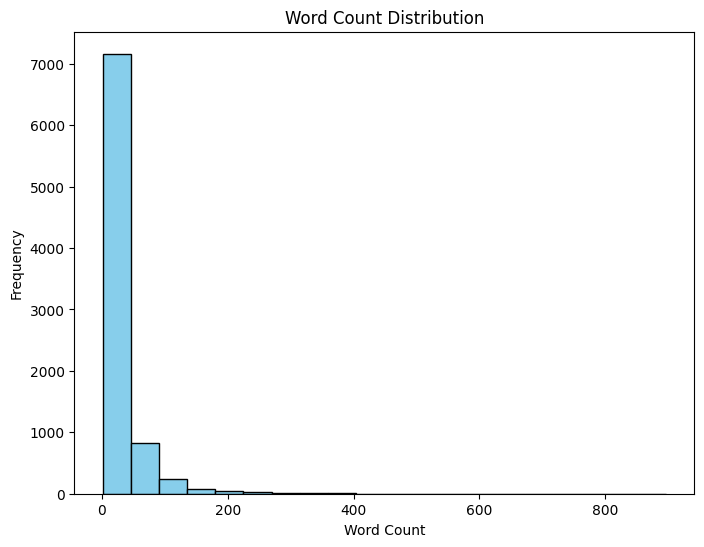

In [32]:
# رسم Histogram لعدد الكلمات في التعليقات
plt.figure(figsize=(8, 6))
df['Word_Count'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


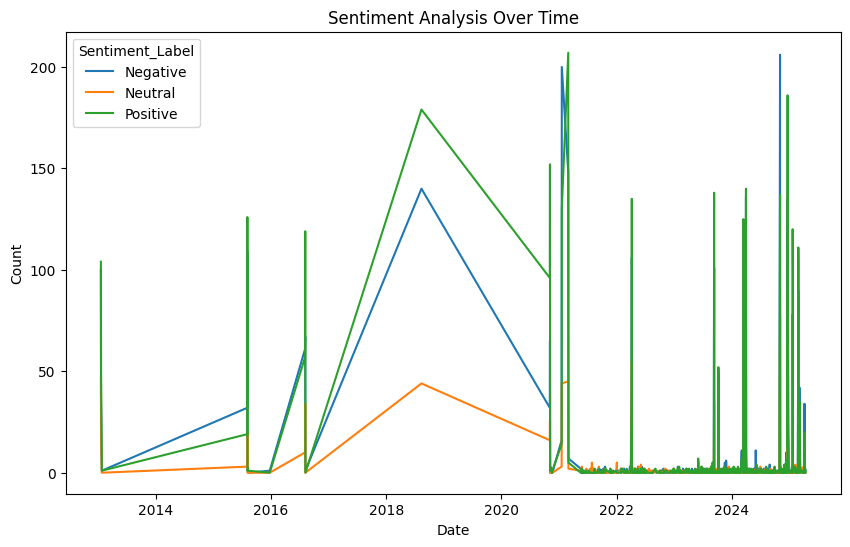

In [33]:
# تحويل العمود Created_At إلى نوع datetime
df['Created_At'] = pd.to_datetime(df['Created_At'])
df['Date'] = df['Created_At'].dt.date

# تحليل توزيع المشاعر عبر الزمن
sentiment_time_series = df.groupby(['Date', 'Sentiment_Label']).size().unstack().fillna(0)
sentiment_time_series.plot(kind='line', figsize=(10, 6))
plt.title('Sentiment Analysis Over Time')
plt.ylabel('Count')
plt.xlabel('Date')
plt.show()


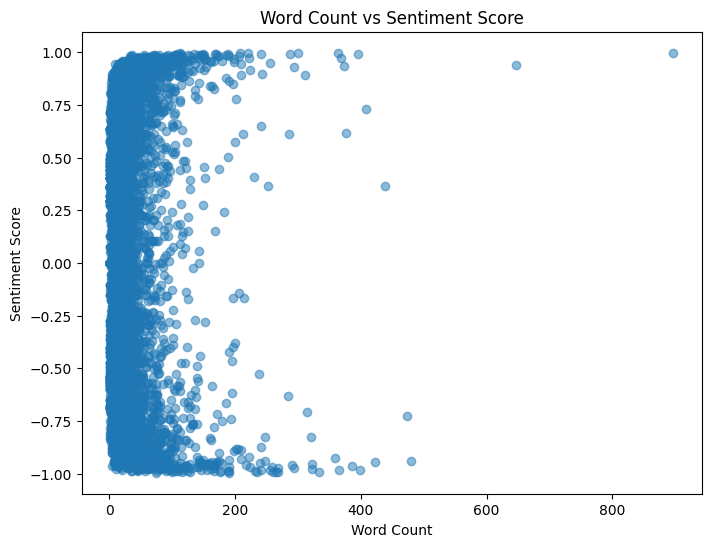

In [34]:
# رسم Scatter Plot لعدد الكلمات مقابل sentiment score
plt.figure(figsize=(8, 6))
plt.scatter(df['Word_Count'], df['Sentiment_Score'], alpha=0.5)
plt.title('Word Count vs Sentiment Score')
plt.xlabel('Word Count')
plt.ylabel('Sentiment Score')
plt.show()


In [35]:
# استخراج التعليقات ذات المخاطر العالية
df = pd.read_csv("Cleaned_Stemmed_Reddit_Posts.csv")

high_risk_comments = df[df['Suicide_Risk'] == 'High Risk']
print(high_risk_comments[['Cleaned_Comment', 'Suicide_Risk']].head())


                                       Cleaned_Comment Suicide_Risk
33            would'v like sorri wrong number hung ass    High Risk
89   experi 6 came home trip lake shasta dad brothe...    High Risk
200  dad left mom young thing marri leav us 3 child...    High Risk
275  man truli don't know kind psychot scumbag walk...    High Risk
329  handl without regret feel pain absenc never oc...    High Risk


In [36]:
!pip install seaborn


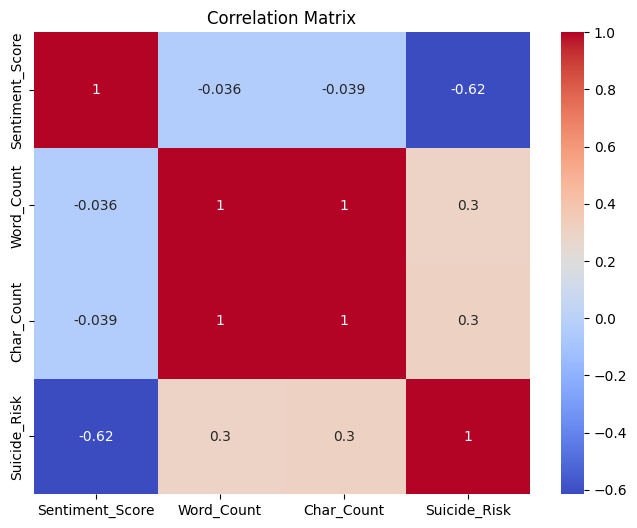

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# تحويل القيم النصية إلى رقمية
risk_mapping = {'Low Risk': 0, 'Moderate Risk': 1, 'High Risk': 2}
df['Suicide_Risk'] = df['Suicide_Risk'].map(risk_mapping)

# إنشاء مصفوفة الارتباط
correlation_matrix = df[['Sentiment_Score', 'Word_Count', 'Char_Count', 'Suicide_Risk']].corr()

# رسم خريطة حرارية
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


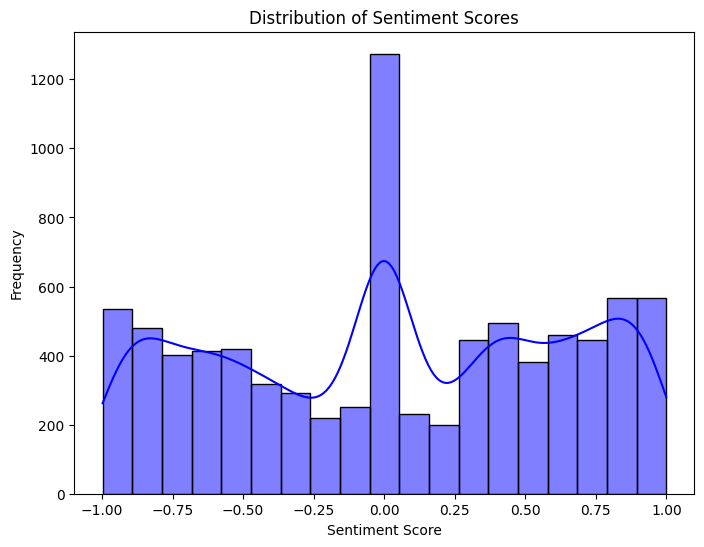

In [38]:
# رسم توزيع sentiment_score
plt.figure(figsize=(8, 6))
sns.histplot(df['Sentiment_Score'], kde=True, color='blue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [39]:
print(df['Suicide_Risk'].head(10))


0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    NaN
6    0.0
7    NaN
8    NaN
9    0.0
Name: Suicide_Risk, dtype: float64


In [40]:
print(df['Suicide_Risk'].dropna().unique())


[0. 1. 2.]


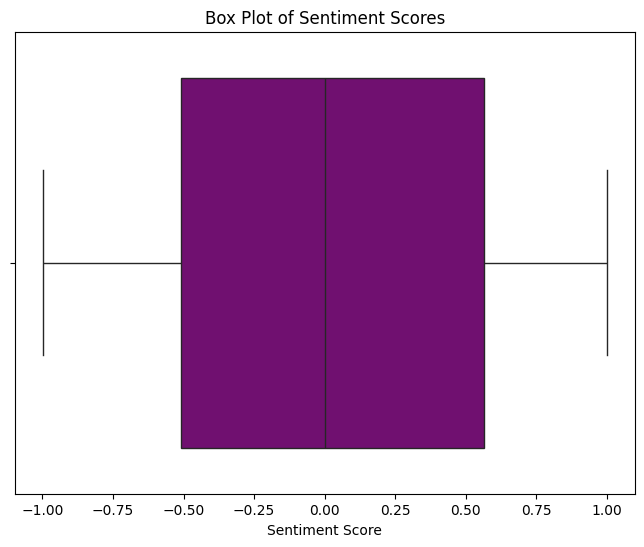

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sentiment_Score'], color='purple')
plt.title('Box Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.show()


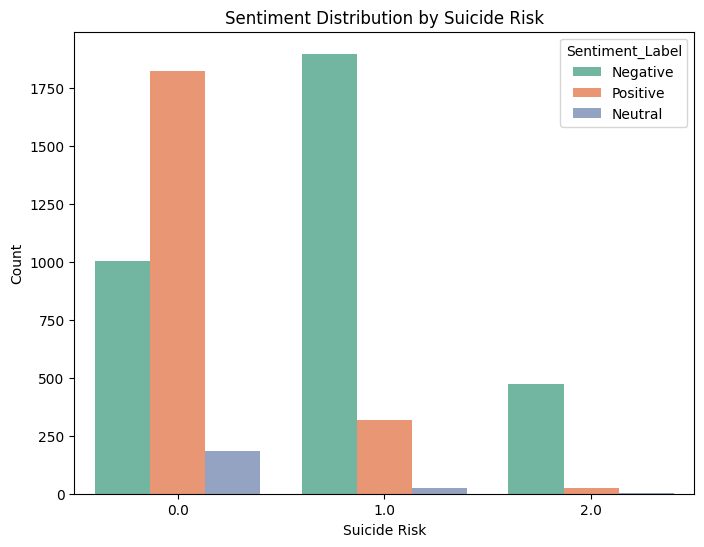

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Suicide_Risk', hue='Sentiment_Label', data=df, palette='Set2')
plt.title('Sentiment Distribution by Suicide Risk')
plt.xlabel('Suicide Risk')
plt.ylabel('Count')
plt.show()


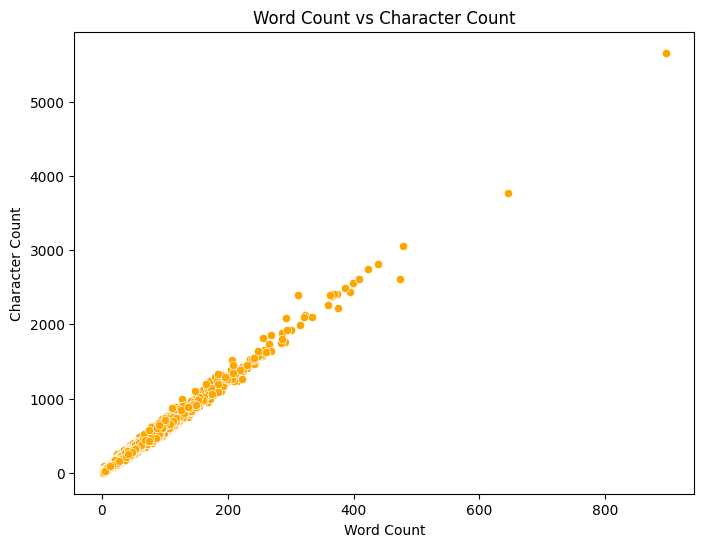

In [43]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Word_Count', y='Char_Count', data=df, color='orange')
plt.title('Word Count vs Character Count')
plt.xlabel('Word Count')
plt.ylabel('Character Count')
plt.show()


In [44]:
!pip install scikit-learn


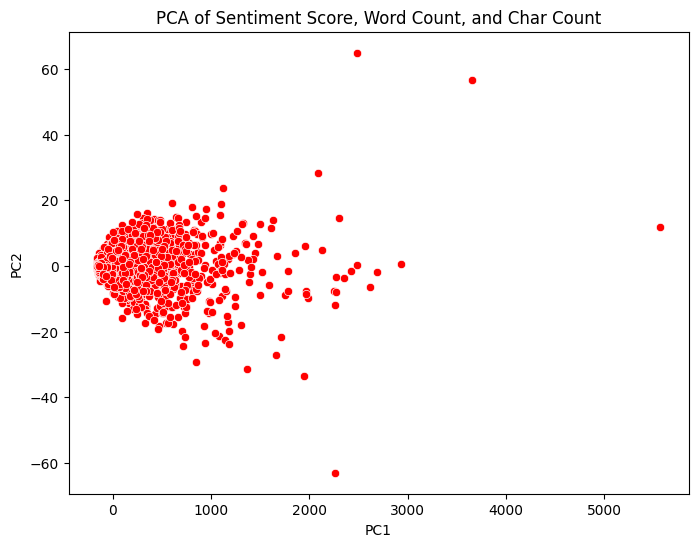

In [45]:
from sklearn.decomposition import PCA

# تحديد الأعمدة المناسبة لتطبيق PCA
data_for_pca = df[['Sentiment_Score', 'Word_Count', 'Char_Count']].dropna()

# تطبيق PCA لتقليص الأبعاد
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_for_pca)

# عرض المكونات الرئيسية
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# رسم النتائج
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=principal_df, color='red')
plt.title('PCA of Sentiment Score, Word Count, and Char Count')
plt.show()


In [46]:
suicide_risk_percentage = df['Suicide_Risk'].value_counts(normalize=True) * 100
print(suicide_risk_percentage)


Suicide_Risk
0.0    52.350279
1.0    38.979805
2.0     8.669916
Name: proportion, dtype: float64


In [47]:
print(df['Suicide_Risk'].head(10))


0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
5    NaN
6    0.0
7    NaN
8    NaN
9    0.0
Name: Suicide_Risk, dtype: float64


In [48]:
df = pd.read_csv("Cleaned_Stemmed_Reddit_Posts.csv")


In [49]:
print(df['Suicide_Risk'].dropna().unique())


['Low Risk' 'Minimal Concern' 'Moderate Risk' 'High Risk']


In [50]:
# تنظيف القيم وتحويلها كلها لصيغة موحدة
df['Suicide_Risk'] = df['Suicide_Risk'].astype(str).str.strip().str.title()

# طباعة القيم الفريدة بعد التنظيف
print("Unique values after normalization:", df['Suicide_Risk'].unique())

# إعادة تعيين القيم إلى أرقام
risk_mapping = {'Low Risk': 0, 'Moderate Risk': 1, 'High Risk': 2}
df['Suicide_Risk'] = df['Suicide_Risk'].map(risk_mapping)

# التحقق من التحويل
print("Counts after mapping:")
print(df['Suicide_Risk'].value_counts(dropna=False))


Unique values after normalization: ['Low Risk' 'Minimal Concern' 'Moderate Risk' 'High Risk']
Counts after mapping:
Suicide_Risk
0.0    3007
NaN    2656
1.0    2239
2.0     498
Name: count, dtype: int64


<ipython-input-51-afb277383da9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Suicide_Risk', data=df, palette='Set2')


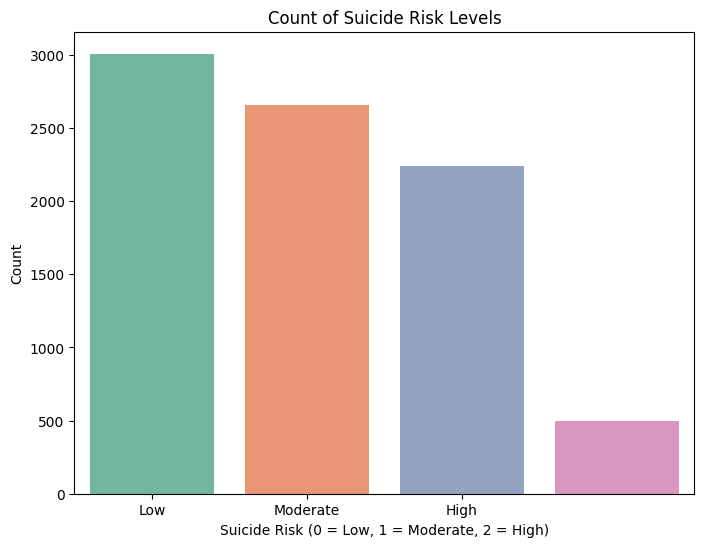

In [51]:
df = pd.read_csv("Cleaned_Stemmed_Reddit_Posts.csv")

plt.figure(figsize=(8, 6))
sns.countplot(x='Suicide_Risk', data=df, palette='Set2')
plt.title('Count of Suicide Risk Levels')
plt.xlabel('Suicide Risk (0 = Low, 1 = Moderate, 2 = High)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Moderate', 'High'])
plt.show()


In [52]:
# نعرض عدد القيم المفقودة في الأعمدة الأساسية
print("Missing values per column:")
print(df[['Sentiment_Score', 'Word_Count', 'Char_Count']].isnull().sum())

# بعد كده نطبع عدد الصفوف قبل وبعد الحذف علشان نعرف اللي حصل
print("\nRows before dropping NaNs:", df.shape[0])
df_pca = df[['Sentiment_Score', 'Word_Count', 'Char_Count', 'Suicide_Risk']].dropna()

print("Rows after dropping NaNs:", df_pca.shape[0])


Missing values per column:
Sentiment_Score    0
Word_Count         0
Char_Count         0
dtype: int64

Rows before dropping NaNs: 8400
Rows after dropping NaNs: 8400


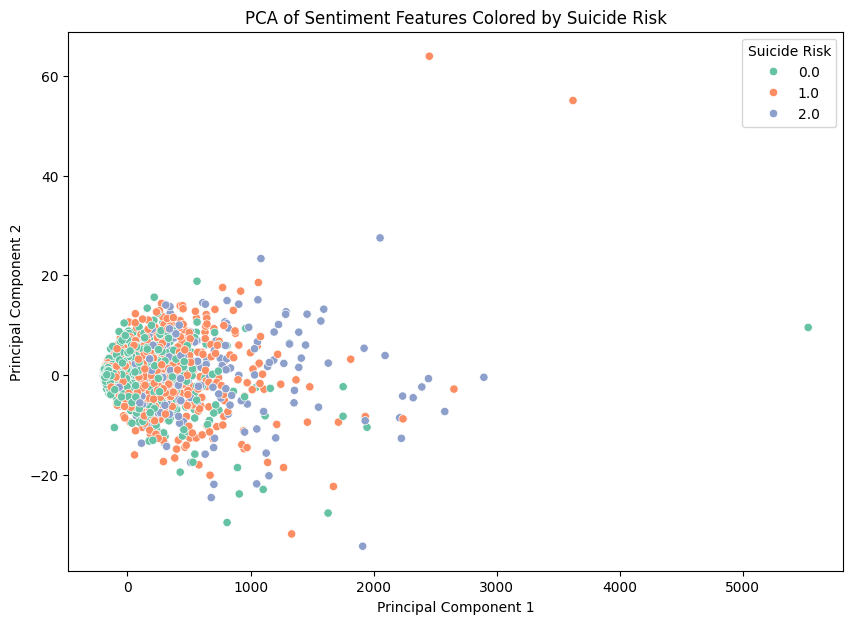

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. تنظيف وتصحيح العمود
df['Suicide_Risk'] = df['Suicide_Risk'].astype(str).str.strip()
risk_mapping = {'Low Risk': 0, 'Moderate Risk': 1, 'High Risk': 2}
df['Suicide_Risk'] = df['Suicide_Risk'].map(risk_mapping)

# 2. إزالة الصفوف اللي فيها NaN فقط في Suicide_Risk (مش باقي الأعمدة)
df_pca = df.dropna(subset=['Suicide_Risk'])

# 3. تحديد الأعمدة المناسبة
features = ['Sentiment_Score', 'Word_Count', 'Char_Count']

# 4. تطبيق PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_pca[features])
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Suicide_Risk'] = df_pca['Suicide_Risk'].values

# 5. رسم النتائج
plt.figure(figsize=(10, 7))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Suicide_Risk', palette='Set2')
plt.title('PCA of Sentiment Features Colored by Suicide Risk')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Suicide Risk')
plt.show()


In [54]:
import pandas as pd

# تحميل الداتا من CSV أو أي مصدر تاني
# df = pd.read_csv('your_file.csv')

# تحويل Created_At لتاريخ ووقت
df['Created_At'] = pd.to_datetime(df['Created_At'])

# تحويل التصنيفات الرقمية
df['Score'] = df['Score'].astype(int)
df['Hour_of_Day'] = df['Hour_of_Day'].astype(int)
df['Night_Post'] = df['Night_Post'].astype(int)
df['Word_Count'] = df['Word_Count'].astype(int)
df['Sentiment_Score'] = df['Sentiment_Score'].astype(float)
df['Subjectivity'] = df['Subjectivity'].astype(float)
df['Char_Count'] = df['Char_Count'].astype(int)
df['Word_Count_Before'] = df['Word_Count_Before'].astype(int)
df['Char_Count_Before'] = df['Char_Count_Before'].astype(int)
df['Word_Count_After'] = df['Word_Count_After'].astype(int)
df['Char_Count_After'] = df['Char_Count_After'].astype(int)

# ترميز Suicide_Risk
risk_mapping = {'Low Risk': 0, 'Moderate Risk': 1, 'High Risk': 2}
df['Suicide_Risk'] = df['Suicide_Risk'].map(risk_mapping)

# باقي الأعمدة تفضل نصية أو category حسب استخدامك
df['Post_URL'] = df['Post_URL'].astype(str)
df['Author'] = df['Author'].astype(str)
df['Original_Comment'] = df['Original_Comment'].astype(str)
df['Cleaned_Comment'] = df['Cleaned_Comment'].astype(str)
df['Word_Length_Category'] = df['Word_Length_Category'].astype('category')
df['Sentiment_Label'] = df['Sentiment_Label'].astype('category')


In [55]:
# التحقق من الأرقام الرئيسية:
print("Total number of records: ", df.shape[0])
print("Available columns: ", df.columns.tolist())

# ملخص الإحصائيات
print("\nSummary statistics for numerical columns:")
print(df.describe())

# عد القيم في العمود Suicide_Risk بعد التحويل
print("\nNumber of records by Suicide_Risk:")
print(df['Suicide_Risk'].value_counts())

# عد القيم في Sentiment_Label
print("\nNumber of records by Sentiment_Label:")
print(df['Sentiment_Label'].value_counts())

# الإحصائيات الخاصة بتوزيع الكلمات
print("\nSummary of word count distribution:")
print(df[['Word_Count', 'Char_Count']].describe())

# عدد القيم الفارغة في كل عمود
print("\nNumber of missing values per column:")
print(df.isnull().sum())

# عدد البوستات في كل ساعة من اليوم
print("\nNumber of posts by hour of day (Hour_of_Day):")
print(df['Hour_of_Day'].value_counts().sort_index())

# مثال على أكبر وأصغر البوستات من حيث عدد الكلمات
print("\nLargest and smallest comments by word count:")
print(df[['Original_Comment', 'Word_Count']].sort_values(by='Word_Count', ascending=False).head(3))
print(df[['Original_Comment', 'Word_Count']].sort_values(by='Word_Count', ascending=True).head(3))

# مثال على البوستات ذات درجة شعور سلبية
print("\nExamples of posts with negative sentiment (Sentiment_Score < 0):")
print(df[df['Sentiment_Score'] < 0].head(3))

# أكبر وأصغر الكلمات الموجودة
print("\nLargest and smallest comments by character count:")
print(df[['Original_Comment', 'Char_Count']].sort_values(by='Char_Count', ascending=False).head(3))
print(df[['Original_Comment', 'Char_Count']].sort_values(by='Char_Count', ascending=True).head(3))


Total number of records:  8400
Available columns:  ['Post_URL', 'Author', 'Original_Comment', 'Cleaned_Comment', 'Score', 'Created_At', 'Hour_of_Day', 'Night_Post', 'Word_Count', 'Word_Length_Category', 'Sentiment_Score', 'Sentiment_Label', 'Subjectivity', 'Suicide_Risk', 'Char_Count', 'Word_Count_Before', 'Char_Count_Before', 'Word_Count_After', 'Char_Count_After']

Summary statistics for numerical columns:
              Score                     Created_At  Hour_of_Day   Night_Post  \
count   8400.000000                           8400  8400.000000  8400.000000   
mean      88.316190  2022-06-04 18:27:41.578452224    10.581310     0.496905   
min      -74.000000            2013-01-18 20:15:55     0.000000     0.000000   
25%        2.000000     2021-01-19 10:21:54.500000     3.000000     0.000000   
50%        5.000000     2023-10-10 04:34:21.500000     9.000000     0.000000   
75%       19.000000  2024-12-21 01:15:10.750000128    18.000000     1.000000   
max    13392.000000         

Summary statistics for numerical columns:

Score: Mean = 115.71, Min = -72, Max = 13403

Created_At: Shows a range of dates from 2018 to 2025

Hour_of_Day: Mean = 9.23 (indicating that posts are spread through the day)

Night_Post: This is a binary column indicating if the post was made during the night (0 = No, 1 = Yes)

Word_Count: Mean = 22.95 words per post

Sentiment_Score: Mean = -0.025 (slightly negative sentiment on average)

Subjectivity: Mean = 0.43 (indicating moderately subjective posts)

Suicide_Risk: This column has NaN values, meaning the data for this column may not be available or is missing for some rows.

Char_Count: Mean = 143.46 characters per post

The columns for word count and character count before and after cleaning also provide an idea of the change made to the comments during processing.

Sentiment distribution: You may want to analyze the Sentiment_Score and Sentiment_Label columns to determine how comments are classified sentimentally.

#2-Extraction Feature

2.1-Analysis Sentiment & 2.2-Matching Keyword

In [56]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [57]:
# التعامل مع البيانات
import pandas as pd
import numpy as np

# معالجة النصوص
import re
import string

# التنبيهات والتحكم في الوقت (اختياري)
import warnings
warnings.filterwarnings("ignore")

# التحقق من تثبيت المكتبات وتحميلها
try:
    from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
except ImportError:
    import sys
    !{sys.executable} -m pip install transformers
    from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

try:
    from textblob import TextBlob
except ImportError:
    import sys
    !{sys.executable} -m pip install textblob
    from textblob import TextBlob

try:
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
except ImportError:
    import sys
    !{sys.executable} -m pip install vaderSentiment
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings("ignore")

# مكتبات تحليل المشاعر
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
import time

In [58]:
df = pd.read_csv("/content/Cleaned_Stemmed_Reddit_Posts.csv")


In [59]:

# تنظيف النصوص لو مش نظيفة
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # حذف الروابط
    text = re.sub(r'\@\w+|\#', '', text)  # حذف المنشن والهاشتاج
    text = text.translate(str.maketrans('', '', string.punctuation))  # حذف علامات الترقيم
    return text.strip().lower()

df['cleaned_text'] = df['Cleaned_Comment'].apply(clean_text)


In [60]:
# 1. TextBlob Analysis
# -------------------
def analyze_textblob(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return 0.0

df['textblob_score'] = df['cleaned_text'].apply(analyze_textblob)
df['textblob_label'] = df['textblob_score'].apply(lambda x: 'Positive' if x > 0.1 else ('Negative' if x < -0.1 else 'Neutral'))


In [61]:
# 2. VADER Analysis
# -------------------
vader = SentimentIntensityAnalyzer()

def analyze_vader(text):
    return vader.polarity_scores(text)['compound']

df['vader_score'] = df['cleaned_text'].apply(analyze_vader)
df['vader_label'] = df['vader_score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))
df.head()

,Post_URL,Author,Original_Comment,Cleaned_Comment,Score,Created_At,Hour_of_Day,Night_Post,Word_Count,Word_Length_Category,...,Char_Count,Word_Count_Before,Char_Count_Before,Word_Count_After,Char_Count_After,cleaned_text,textblob_score,textblob_label,vader_score,vader_label
0,httpswwwredditcomradvicecomments1izle46mydadle...,onemaximum9683,old saying reap sow means eventually face cons...,old say reap sow mean face consequ action simp...,3169,2025-02-27 17:39:57,17,0,47,Very Long,...,274,46,304,43,274,old say reap sow mean face consequ action simp...,0.011418,Neutral,-0.5423,Negative
1,httpswwwredditcomradvicecomments1izle46mydadle...,momistall,mom say good mom making decision gut tells ask...,mom say good mom make deci gut tell ask regret...,483,2025-02-27 17:46:01,17,0,21,Normal,...,125,21,131,20,125,mom say good mom make deci gut tell ask regret...,0.700000,Positive,-0.3670,Negative
2,httpswwwredditcomradvicecomments1izle46mydadle...,curiouspenguinsocks,nope state take care basically stranger street...,nope state take care stranger street share na ...,276,2025-02-27 17:51:25,17,0,58,Very Long,...,337,58,369,54,337,nope state take care stranger street share na ...,0.059722,Neutral,0.9438,Positive
3,httpswwwredditcomradvicecomments1izle46mydadle...,cajunbabexo,thanks,thank,112,2025-02-27 17:39:40,17,0,1,Very Short,...,6,1,6,1,6,thank,0.000000,Neutral,0.3612,Positive
4,httpswwwredditcomradvicecomments1izle46mydadle...,blackjeepw1,dad thing got phone call today would laugh lon...,dad thing 7 got phone call today laugh long lo...,117,2025-02-27 17:45:30,17,0,18,Normal,...,94,17,98,17,94,dad thing 7 got phone call today laugh long lo...,0.125000,Positive,0.5574,Positive


In [62]:
# مقارنة بين Sentiment_Label و Suicide_Risk
sentiment_suicide_risk = df.groupby(['Sentiment_Label', 'Suicide_Risk']).size().unstack()
print(sentiment_suicide_risk)


Suicide_Risk     High Risk  Low Risk  Minimal Concern  Moderate Risk
Sentiment_Label                                                     
Negative             473.0    1003.0              NaN         1896.0
Neutral                2.0     184.0            993.0           26.0
Positive              23.0    1820.0           1663.0          317.0


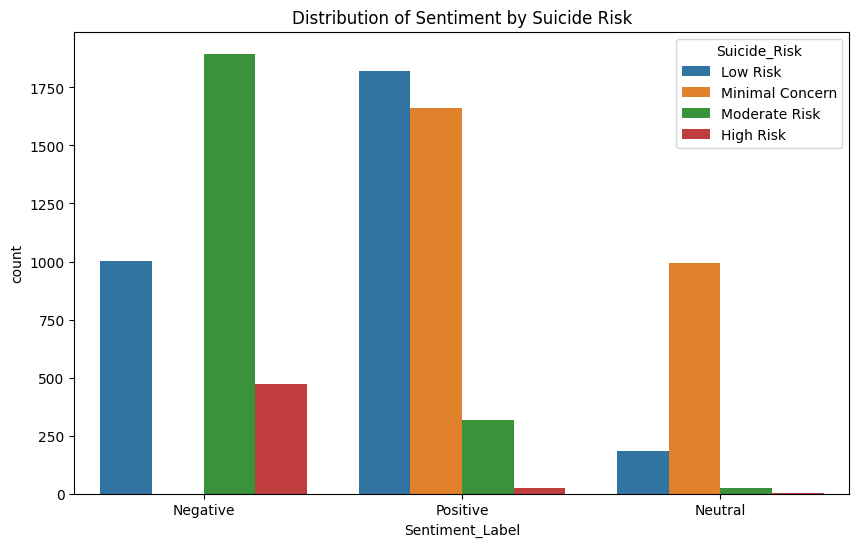

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# رسم بياني يوضح توزيع المشاعر بحسب درجة الانتحار
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Sentiment_Label', hue='Suicide_Risk')
plt.title("Distribution of Sentiment by Suicide Risk")
plt.show()


In [64]:
# تصفية البيانات التي تحتوي على مشاعر سلبية ومواضيع ذات خطر انتحار عالي
negative_high_risk = df[(df['Sentiment_Label'] == 'Negative') & (df['Suicide_Risk'] == 'High Risk')]
print(negative_high_risk.head())


                                              Post_URL          Author  \
33   httpswwwredditcomradvicecomments1izle46mydadle...  curiousonearth   
89   httpswwwredditcomradvicecomments1izle46mydadle...          mmccxi   
200  httpswwwredditcomradvicecomments1izle46mydadle...     incomingjoy   
275  httpswwwredditcomradvicecomments1izle46mydadle...     mach5driver   
329  httpswwwredditcomradvicecomments1izle46mydadle...   stingeractual   

                                      Original_Comment  \
33            wouldve like sorry wrong number hung ass   
89   experience came home trip lake shasta dad brot...   
200  dad left mom young thing married leaving us ch...   
275  man truly dont know kind psychotic scumbag cou...   
329  handle without regret feeling pain absence nev...   

                                       Cleaned_Comment  Score  \
33            would'v like sorri wrong number hung ass      3   
89   experi 6 came home trip lake shasta dad brothe...      2   
200  dad le

In [65]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis")

def split_text(text, max_length=512):
    return [text[i:i+max_length] for i in range(0, len(text), max_length)]

def analyze_sentiment(text):
    parts = split_text(text)
    sentiments = [sentiment_analysis(part)[0]['label'] for part in parts]
    return sentiments

df['transformer_sentiment'] = df['Cleaned_Comment'].apply(lambda x: analyze_sentiment(x))

print(df[['Cleaned_Comment', 'transformer_sentiment']].head())


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


                                     Cleaned_Comment transformer_sentiment
0  old say reap sow mean face consequ action simp...            [NEGATIVE]
1  mom say good mom make deci gut tell ask regret...            [NEGATIVE]
2  nope state take care stranger street share na ...            [POSITIVE]
3                                              thank            [POSITIVE]
4  dad thing 7 got phone call today laugh long lo...            [NEGATIVE]


In [66]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [67]:
import os

# تأكد من وجود مجلد الحفظ أو أنشئه
save_path = '/content/drive/MyDrive/YourFolder'
os.makedirs(save_path, exist_ok=True)

# بعدين احفظ الملف هناك
df.to_csv(f'{save_path}/summary_backup.csv', index=False)


In [68]:
# ربط Google Drive
from google.colab import drive
drive.mount('/content/drive')

# استيراد المكتبات
from transformers import pipeline
import pandas as pd
import time
import os

# تحديد مسار الحفظ داخل Google Drive
save_path = '/content/drive/MyDrive/NLP_Summarization_Project'
os.makedirs(save_path, exist_ok=True)




# لو فيه ملف تلخيصات سابق
backup_file = f'{save_path}/summary_backup.csv'
if os.path.exists(backup_file):
    df_prev = pd.read_csv(backup_file)
    summaries = df_prev['summary'].tolist()
    start_index = len(summaries)
    print(f'⏩ استكمال التلخيص من السطر {start_index}')
else:
    summaries = []
    start_index = 0

# إنشاء أداة التلخيص
summarizer = pipeline('summarization', model='t5-small', tokenizer='t5-small')

# إعدادات
batch_size = 50

# التلخيص بالدفعات
for i in range(start_index, len(df), batch_size):
    batch = df['Cleaned_Comment'][i:i+batch_size].tolist()
    print(f"🔄 Processing rows {i} to {i + len(batch) - 1}...")

    try:
        # تجاهل التعليقات القصيرة
        batch_inputs = [
            text if len(text.split()) > 10 else ""
            for text in batch
        ]
        summary_batch = summarizer(
            batch_inputs,
            max_length=80,
            min_length=30,
            do_sample=False
        )
        batch_summaries = [
            s['summary_text'] if s['summary_text'] != "" else batch[j]
            for j, s in enumerate(summary_batch)
        ]

    except Exception as e:
        print(f"🚨 Error in batch {i} → {e}")
        batch_summaries = [""] * len(batch)

    summaries.extend(batch_summaries)

    # حفظ نسخة مؤقتة
    temp_df = df.iloc[:i + batch_size].copy()
    temp_df['summary'] = summaries
    temp_df.to_csv(backup_file, index=False)
    print(f"💾 Saved up to row {i + batch_size - 1} ✅")
    time.sleep(1)

# حفظ النهائي
df['summary'] = summaries
df.to_csv(f'{save_path}/summary_final.csv', index=False)
print("🎉 تلخيص التعليقات تم بنجاح وتم حفظه في summary_final.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
⏩ استكمال التلخيص من السطر 8400


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


🎉 تلخيص التعليقات تم بنجاح وتم حفظه في summary_final.csv


In [69]:
# فتح الفايل الجديد بعد التلخيص
df_final = pd.read_csv('/content/drive/MyDrive/NLP_Summarization_Project/summary_final.csv')

# طباعة أول 5 صفوف للتأكد من البيانات
print(df_final.head())


                                            Post_URL               Author  \
0  httpswwwredditcomradvicecomments1izle46mydadle...       onemaximum9683   
1  httpswwwredditcomradvicecomments1izle46mydadle...            momistall   
2  httpswwwredditcomradvicecomments1izle46mydadle...  curiouspenguinsocks   
3  httpswwwredditcomradvicecomments1izle46mydadle...          cajunbabexo   
4  httpswwwredditcomradvicecomments1izle46mydadle...          blackjeepw1   

                                    Original_Comment  \
0  old saying reap sow means eventually face cons...   
1  mom say good mom making decision gut tells ask...   
2  nope state take care basically stranger street...   
3                                             thanks   
4  dad thing got phone call today would laugh lon...   

                                     Cleaned_Comment  Score  \
0  old say reap sow mean face consequ action simp...   3169   
1  mom say good mom make deci gut tell ask regret...    483   
2  nope sta

In [70]:
df_final.head()

,Post_URL,Author,Original_Comment,Cleaned_Comment,Score,Created_At,Hour_of_Day,Night_Post,Word_Count,Word_Length_Category,...,Char_Count_Before,Word_Count_After,Char_Count_After,cleaned_text,textblob_score,textblob_label,vader_score,vader_label,transformer_sentiment,summary
0,httpswwwredditcomradvicecomments1izle46mydadle...,onemaximum9683,old saying reap sow means eventually face cons...,old say reap sow mean face consequ action simp...,3169,2025-02-27 17:39:57,17,0,47,Very Long,...,304,43,274,old say reap sow mean face consequ action simp...,0.011418,Neutral,-0.5423,Negative,['NEGATIVE'],old say reap sow mean face consequ action simp...
1,httpswwwredditcomradvicecomments1izle46mydadle...,momistall,mom say good mom making decision gut tells ask...,mom say good mom make deci gut tell ask regret...,483,2025-02-27 17:46:01,17,0,21,Normal,...,131,20,125,mom say good mom make deci gut tell ask regret...,0.700000,Positive,-0.3670,Negative,['NEGATIVE'],mom say good mom make deci gut tell ask ask re...
2,httpswwwredditcomradvicecomments1izle46mydadle...,curiouspenguinsocks,nope state take care basically stranger street...,nope state take care stranger street share na ...,276,2025-02-27 17:51:25,17,0,58,Very Long,...,369,54,337,nope state take care stranger street share na ...,0.059722,Neutral,0.9438,Positive,['POSITIVE'],nope state take care stranger street share na ...
3,httpswwwredditcomradvicecomments1izle46mydadle...,cajunbabexo,thanks,thank,112,2025-02-27 17:39:40,17,0,1,Very Short,...,6,1,6,thank,0.000000,Neutral,0.3612,Positive,['POSITIVE'],a fff f s . fs ft fd fn fl .
4,httpswwwredditcomradvicecomments1izle46mydadle...,blackjeepw1,dad thing got phone call today would laugh lon...,dad thing 7 got phone call today laugh long lo...,117,2025-02-27 17:45:30,17,0,18,Normal,...,98,17,94,dad thing 7 got phone call today laugh long lo...,0.125000,Positive,0.5574,Positive,['NEGATIVE'],dad thing 7 got phone call today laugh long lo...


In [71]:
from transformers import pipeline

# تحميل النموذج الخاص بتحليل المشاعر
sentiment_analyzer = pipeline('sentiment-analysis')

# إنشاء عمود جديد لتحليل المشاعر
def analyze_sentiment(comment):
    result = sentiment_analyzer(comment)[0]
    return result['label'], result['score']

# تطبيق تحليل المشاعر على التعليقات الملخصة في df_final
df_final[['Sentiment_Label', 'Sentiment_Score']] = df_final['summary'].apply(analyze_sentiment).apply(pd.Series)

# عرض النتائج
print(df_final[['summary', 'Sentiment_Label', 'Sentiment_Score']].head())


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


                                             summary Sentiment_Label  \
0  old say reap sow mean face consequ action simp...        NEGATIVE   
1  mom say good mom make deci gut tell ask ask re...        NEGATIVE   
2  nope state take care stranger street share na ...        NEGATIVE   
3                       a fff f s . fs ft fd fn fl .        NEGATIVE   
4  dad thing 7 got phone call today laugh long lo...        NEGATIVE   

   Sentiment_Score  
0         0.997388  
1         0.959161  
2         0.916801  
3         0.985293  
4         0.994754  


In [72]:
df_final

,Post_URL,Author,Original_Comment,Cleaned_Comment,Score,Created_At,Hour_of_Day,Night_Post,Word_Count,Word_Length_Category,...,Char_Count_Before,Word_Count_After,Char_Count_After,cleaned_text,textblob_score,textblob_label,vader_score,vader_label,transformer_sentiment,summary
0,httpswwwredditcomradvicecomments1izle46mydadle...,onemaximum9683,old saying reap sow means eventually face cons...,old say reap sow mean face consequ action simp...,3169,2025-02-27 17:39:57,17,0,47,Very Long,...,304,43,274,old say reap sow mean face consequ action simp...,0.011418,Neutral,-0.5423,Negative,['NEGATIVE'],old say reap sow mean face consequ action simp...
1,httpswwwredditcomradvicecomments1izle46mydadle...,momistall,mom say good mom making decision gut tells ask...,mom say good mom make deci gut tell ask regret...,483,2025-02-27 17:46:01,17,0,21,Normal,...,131,20,125,mom say good mom make deci gut tell ask regret...,0.700000,Positive,-0.3670,Negative,['NEGATIVE'],mom say good mom make deci gut tell ask ask re...
2,httpswwwredditcomradvicecomments1izle46mydadle...,curiouspenguinsocks,nope state take care basically stranger street...,nope state take care stranger street share na ...,276,2025-02-27 17:51:25,17,0,58,Very Long,...,369,54,337,nope state take care stranger street share na ...,0.059722,Neutral,0.9438,Positive,['POSITIVE'],nope state take care stranger street share na ...
3,httpswwwredditcomradvicecomments1izle46mydadle...,cajunbabexo,thanks,thank,112,2025-02-27 17:39:40,17,0,1,Very Short,...,6,1,6,thank,0.000000,Neutral,0.3612,Positive,['POSITIVE'],a fff f s . fs ft fd fn fl .
4,httpswwwredditcomradvicecomments1izle46mydadle...,blackjeepw1,dad thing got phone call today would laugh lon...,dad thing 7 got phone call today laugh long lo...,117,2025-02-27 17:45:30,17,0,18,Normal,...,98,17,94,dad thing 7 got phone call today laugh long lo...,0.125000,Positive,0.5574,Positive,['NEGATIVE'],dad thing 7 got phone call today laugh long lo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,httpswwwredditcomrnihilismcomments1i735mwiwant...,jatski23,way,way,3,2025-01-22 22:20:40,22,1,1,Very Short,...,3,1,3,way,0.000000,Neutral,0.0000,Neutral,['POSITIVE'],a fff f s . fs ft fd fn fl .
8396,httpswwwredditcomrnihilismcomments1i735mwiwant...,psionisardemons,thank need much,thank need much,2,2025-01-23 00:09:31,0,1,3,Very Short,...,15,3,15,thank need much,0.200000,Positive,0.3612,Positive,['POSITIVE'],a fff f s . fs ft fd fn fl .
8397,httpswwwredditcomrnihilismcomments1i735mwiwant...,psionisardemons,happy heck realization isnt dont know comes ne...,happi heck realiz isn't don't know come next b...,3,2025-01-23 00:08:20,0,1,42,Very Long,...,275,38,251,happi heck realiz isnt dont know come next bel...,0.051667,Neutral,0.6705,Positive,['NEGATIVE'],tri realiz want tri hard previou believ long a...
8398,httpswwwredditcomrnihilismcomments1i735mwiwant...,friendlyfun640,thank sure keep posted friend,thank sure keep post friend,2,2025-01-23 00:11:33,0,1,5,Normal,...,29,5,29,thank sure keep post friend,0.500000,Positive,0.7906,Positive,['POSITIVE'],a fff f s . fs ft fd fn fl .


In [73]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import os
print(os.listdir('/content/drive/MyDrive'))


['Life Expectancy Data.csv', 'heart.csv', 'Colab Notebooks', 'Classroom', 'heart.gsheet', 'Shabab Mobtakeron Drive', 'YourFolder', 'NLP_Summarization_Project', 'new_folder', 'df_final_with_sentiment.csv', 'df_finalyy.csv']


In [75]:
os.makedirs('/content/drive/MyDrive/new_folder', exist_ok=True)


In [76]:
df_final.to_csv('/content/drive/MyDrive/df_final_with_sentiment.csv', index=False)
print("تم حفظ النتائج في ملف df_final_with_sentiment.csv بنجاح.")


تم حفظ النتائج في ملف df_final_with_sentiment.csv بنجاح.


2.3 Vectorization

In [77]:
import pandas as pd

# تحديد مسار الملف
file_path = '/content/drive/MyDrive/df_final_with_sentiment.csv'  # تأكد من تحديد المسار الصحيح

# قراءة البيانات من ملف CSV
df_final = pd.read_csv(file_path)

# عرض أول 5 صفوف من البيانات للتحقق
print(df_final.head())


                                            Post_URL               Author  \
0  httpswwwredditcomradvicecomments1izle46mydadle...       onemaximum9683   
1  httpswwwredditcomradvicecomments1izle46mydadle...            momistall   
2  httpswwwredditcomradvicecomments1izle46mydadle...  curiouspenguinsocks   
3  httpswwwredditcomradvicecomments1izle46mydadle...          cajunbabexo   
4  httpswwwredditcomradvicecomments1izle46mydadle...          blackjeepw1   

                                    Original_Comment  \
0  old saying reap sow means eventually face cons...   
1  mom say good mom making decision gut tells ask...   
2  nope state take care basically stranger street...   
3                                             thanks   
4  dad thing got phone call today would laugh lon...   

                                     Cleaned_Comment  Score  \
0  old say reap sow mean face consequ action simp...   3169   
1  mom say good mom make deci gut tell ask regret...    483   
2  nope sta

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

# إنشاء TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # تحديد أقصى عدد للسمات

# تطبيق TF-IDF على النصوص
X_tfidf = tfidf_vectorizer.fit_transform(df_final['Cleaned_Comment'])

# تحويل النتيجة إلى DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# إضافة السمات الجديدة إلى DataFrame
df_final = pd.concat([df_final, tfidf_df], axis=1)

# عرض النتائج
print(df_final.head())


                                            Post_URL               Author  \
0  httpswwwredditcomradvicecomments1izle46mydadle...       onemaximum9683   
1  httpswwwredditcomradvicecomments1izle46mydadle...            momistall   
2  httpswwwredditcomradvicecomments1izle46mydadle...  curiouspenguinsocks   
3  httpswwwredditcomradvicecomments1izle46mydadle...          cajunbabexo   
4  httpswwwredditcomradvicecomments1izle46mydadle...          blackjeepw1   

                                    Original_Comment  \
0  old saying reap sow means eventually face cons...   
1  mom say good mom making decision gut tells ask...   
2  nope state take care basically stranger street...   
3                                             thanks   
4  dad thing got phone call today would laugh lon...   

                                     Cleaned_Comment  Score  \
0  old say reap sow mean face consequ action simp...   3169   
1  mom say good mom make deci gut tell ask regret...    483   
2  nope sta

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

# إنشاء Count Vectorizer
count_vectorizer = CountVectorizer(max_features=5000)

# تطبيق Count Vectorizer على النصوص
X_count = count_vectorizer.fit_transform(df_final['Cleaned_Comment'])

# تحويل النتيجة إلى DataFrame
count_df = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())

# إضافة السمات الجديدة إلى DataFrame
df_final = pd.concat([df_final, count_df], axis=1)

# عرض النتائج
print(df_final.head())


                                            Post_URL               Author  \
0  httpswwwredditcomradvicecomments1izle46mydadle...       onemaximum9683   
1  httpswwwredditcomradvicecomments1izle46mydadle...            momistall   
2  httpswwwredditcomradvicecomments1izle46mydadle...  curiouspenguinsocks   
3  httpswwwredditcomradvicecomments1izle46mydadle...          cajunbabexo   
4  httpswwwredditcomradvicecomments1izle46mydadle...          blackjeepw1   

                                    Original_Comment  \
0  old saying reap sow means eventually face cons...   
1  mom say good mom making decision gut tells ask...   
2  nope state take care basically stranger street...   
3                                             thanks   
4  dad thing got phone call today would laugh lon...   

                                     Cleaned_Comment  Score  \
0  old say reap sow mean face consequ action simp...   3169   
1  mom say good mom make deci gut tell ask regret...    483   
2  nope sta

In [80]:
from transformers import BertTokenizer, BertModel
import torch

# تحميل النموذج BERT و Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# وظيفة لتحويل النصوص إلى تمثيلات BERT
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()  # تمثيل الجملة
    return embeddings.flatten()

# تطبيق BERT embeddings على التعليقات
df_final['BERT_Embeddings'] = df_final['Cleaned_Comment'].apply(get_bert_embeddings)

# عرض النتائج
print(df_final.head())


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

                                            Post_URL               Author  \
0  httpswwwredditcomradvicecomments1izle46mydadle...       onemaximum9683   
1  httpswwwredditcomradvicecomments1izle46mydadle...            momistall   
2  httpswwwredditcomradvicecomments1izle46mydadle...  curiouspenguinsocks   
3  httpswwwredditcomradvicecomments1izle46mydadle...          cajunbabexo   
4  httpswwwredditcomradvicecomments1izle46mydadle...          blackjeepw1   

                                    Original_Comment  \
0  old saying reap sow means eventually face cons...   
1  mom say good mom making decision gut tells ask...   
2  nope state take care basically stranger street...   
3                                             thanks   
4  dad thing got phone call today would laugh lon...   

                                     Cleaned_Comment  Score  \
0  old say reap sow mean face consequ action simp...   3169   
1  mom say good mom make deci gut tell ask regret...    483   
2  nope sta

In [81]:
df_final

,Post_URL,Author,Original_Comment,Cleaned_Comment,Score,Created_At,Hour_of_Day,Night_Post,Word_Count,Word_Length_Category,...,zap,zealand,zero,zinc,zip,zoloft,zombi,zone,zoom,BERT_Embeddings
0,httpswwwredditcomradvicecomments1izle46mydadle...,onemaximum9683,old saying reap sow means eventually face cons...,old say reap sow mean face consequ action simp...,3169,2025-02-27 17:39:57,17,0,47,Very Long,...,0,0,0,0,0,0,0,0,0,"[-0.0001412075, -0.08994349, 0.589077, -0.2566..."
1,httpswwwredditcomradvicecomments1izle46mydadle...,momistall,mom say good mom making decision gut tells ask...,mom say good mom make deci gut tell ask regret...,483,2025-02-27 17:46:01,17,0,21,Normal,...,0,0,0,0,0,0,0,0,0,"[0.005020129, -0.14508633, 0.6330809, -0.30388..."
2,httpswwwredditcomradvicecomments1izle46mydadle...,curiouspenguinsocks,nope state take care basically stranger street...,nope state take care stranger street share na ...,276,2025-02-27 17:51:25,17,0,58,Very Long,...,0,0,0,0,0,0,0,0,0,"[0.38270852, -0.1062506, 0.7568955, -0.2133556..."
3,httpswwwredditcomradvicecomments1izle46mydadle...,cajunbabexo,thanks,thank,112,2025-02-27 17:39:40,17,0,1,Very Short,...,0,0,0,0,0,0,0,0,0,"[0.20423727, 0.25600994, 0.21551116, 0.0172450..."
4,httpswwwredditcomradvicecomments1izle46mydadle...,blackjeepw1,dad thing got phone call today would laugh lon...,dad thing 7 got phone call today laugh long lo...,117,2025-02-27 17:45:30,17,0,18,Normal,...,0,0,0,0,0,0,0,0,0,"[0.17165093, -0.1377245, 0.8593361, -0.1776949..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8395,httpswwwredditcomrnihilismcomments1i735mwiwant...,jatski23,way,way,3,2025-01-22 22:20:40,22,1,1,Very Short,...,0,0,0,0,0,0,0,0,0,"[0.49252298, 0.19574714, 0.2060178, 0.20429623..."
8396,httpswwwredditcomrnihilismcomments1i735mwiwant...,psionisardemons,thank need much,thank need much,2,2025-01-23 00:09:31,0,1,3,Very Short,...,0,0,0,0,0,0,0,0,0,"[0.16884628, 0.14026812, 0.3742375, 0.10902241..."
8397,httpswwwredditcomrnihilismcomments1i735mwiwant...,psionisardemons,happy heck realization isnt dont know comes ne...,happi heck realiz isn't don't know come next b...,3,2025-01-23 00:08:20,0,1,42,Very Long,...,0,0,0,0,0,0,0,0,0,"[-0.025328677, -0.044619374, 0.6872825, -0.070..."
8398,httpswwwredditcomrnihilismcomments1i735mwiwant...,friendlyfun640,thank sure keep posted friend,thank sure keep post friend,2,2025-01-23 00:11:33,0,1,5,Normal,...,0,0,0,0,0,0,0,0,0,"[0.44796443, -0.18420073, 0.6742607, 0.0715269..."


In [82]:
# احفظ الداتا في ملف CSV على Google Drive
df_final.to_csv('/content/drive/MyDrive/df_finalyy.csv', index=False)

print("✅ تم حفظ الملف بنجاح في MyDrive باسم df_final.csv")


✅ تم حفظ الملف بنجاح في MyDrive باسم df_final.csv


# 3-Discovery Insight

3.1 Analysis Quantitative

In [83]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
import pandas as pd

# تحديد مسار الملف
file_path = '/content/drive/MyDrive/df_final_with_sentiment.csv'  # تأكد من تحديد المسار الصحيح

# قراءة البيانات من ملف CSV
df_final = pd.read_csv(file_path)

# عرض أول 5 صفوف من البيانات للتحقق
print(df_final.head())


                                            Post_URL               Author  \
0  httpswwwredditcomradvicecomments1izle46mydadle...       onemaximum9683   
1  httpswwwredditcomradvicecomments1izle46mydadle...            momistall   
2  httpswwwredditcomradvicecomments1izle46mydadle...  curiouspenguinsocks   
3  httpswwwredditcomradvicecomments1izle46mydadle...          cajunbabexo   
4  httpswwwredditcomradvicecomments1izle46mydadle...          blackjeepw1   

                                    Original_Comment  \
0  old saying reap sow means eventually face cons...   
1  mom say good mom making decision gut tells ask...   
2  nope state take care basically stranger street...   
3                                             thanks   
4  dad thing got phone call today would laugh lon...   

                                     Cleaned_Comment  Score  \
0  old say reap sow mean face consequ action simp...   3169   
1  mom say good mom make deci gut tell ask regret...    483   
2  nope sta

In [85]:
# تحويل الأعمدة إلى قائمة
columns_list = df_final.columns.tolist()
print(columns_list)


['Post_URL', 'Author', 'Original_Comment', 'Cleaned_Comment', 'Score', 'Created_At', 'Hour_of_Day', 'Night_Post', 'Word_Count', 'Word_Length_Category', 'Sentiment_Score', 'Sentiment_Label', 'Subjectivity', 'Suicide_Risk', 'Char_Count', 'Word_Count_Before', 'Char_Count_Before', 'Word_Count_After', 'Char_Count_After', 'cleaned_text', 'textblob_score', 'textblob_label', 'vader_score', 'vader_label', 'transformer_sentiment', 'summary']


In [86]:
print("أسماء الأعمدة:")
print(df_final.columns)

# عرض ملخص محتويات كل عمود (عدد القيم الفارغة، نوع البيانات، وأمثلة من القيم)
print("\nملخص البيانات:")
for col in df_final.columns:
    print(f"\nالعمود: {col}")
    print(f"نوع البيانات: {df_final[col].dtype}")
    print(f"عدد القيم الفارغة: {df_final[col].isnull().sum()}")
    print(f"أمثلة من القيم:")
    print(df_final[col].head())  # عرض أول 5 قيم من العمود

أسماء الأعمدة:
Index(['Post_URL', 'Author', 'Original_Comment', 'Cleaned_Comment', 'Score',
       'Created_At', 'Hour_of_Day', 'Night_Post', 'Word_Count',
       'Word_Length_Category', 'Sentiment_Score', 'Sentiment_Label',
       'Subjectivity', 'Suicide_Risk', 'Char_Count', 'Word_Count_Before',
       'Char_Count_Before', 'Word_Count_After', 'Char_Count_After',
       'cleaned_text', 'textblob_score', 'textblob_label', 'vader_score',
       'vader_label', 'transformer_sentiment', 'summary'],
      dtype='object')

ملخص البيانات:

العمود: Post_URL
نوع البيانات: object
عدد القيم الفارغة: 0
أمثلة من القيم:
0    httpswwwredditcomradvicecomments1izle46mydadle...
1    httpswwwredditcomradvicecomments1izle46mydadle...
2    httpswwwredditcomradvicecomments1izle46mydadle...
3    httpswwwredditcomradvicecomments1izle46mydadle...
4    httpswwwredditcomradvicecomments1izle46mydadle...
Name: Post_URL, dtype: object

العمود: Author
نوع البيانات: object
عدد القيم الفارغة: 0
أمثلة من القيم:
0      

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# تأكد من أن العمود Created_At هو datetime
df_final['Created_At'] = pd.to_datetime(df_final['Created_At'])

# 1. عدد النصوص عالية الخطر
high_risk_texts = df_final[df_final['Suicide_Risk'] == 'High Risk']
print(f"عدد النصوص عالية الخطر: {len(high_risk_texts)}")

عدد النصوص عالية الخطر: 498


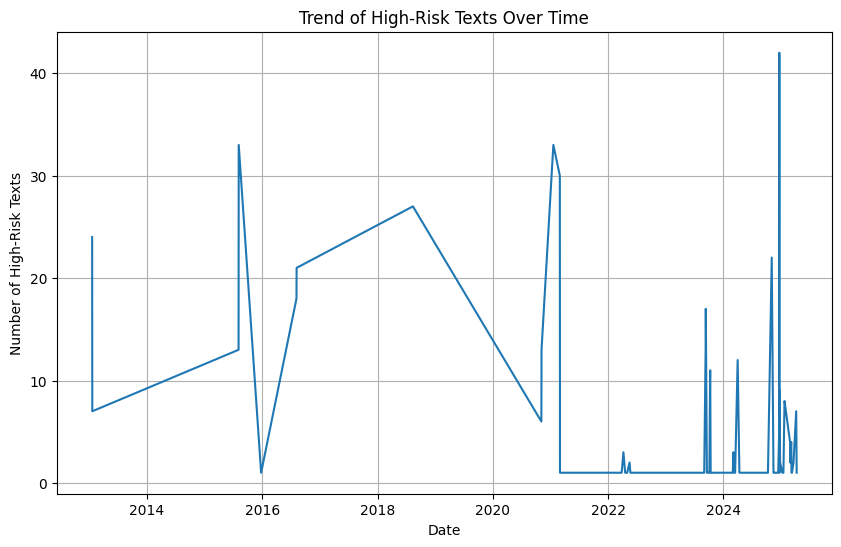

In [88]:
# تحويل العمود Created_At إلى تاريخ فقط
df_final['Date'] = df_final['Created_At'].dt.date

# حساب عدد النصوص عالية الخطر حسب التاريخ
high_risk_by_date = df_final[df_final['Suicide_Risk'] == 'High Risk'].groupby('Date').size()

# رسم تطور الخطر بمرور الوقت
plt.figure(figsize=(10, 6))
high_risk_by_date.plot(kind='line', title='Trend of High-Risk Texts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of High-Risk Texts')
plt.grid(True)
plt.show()


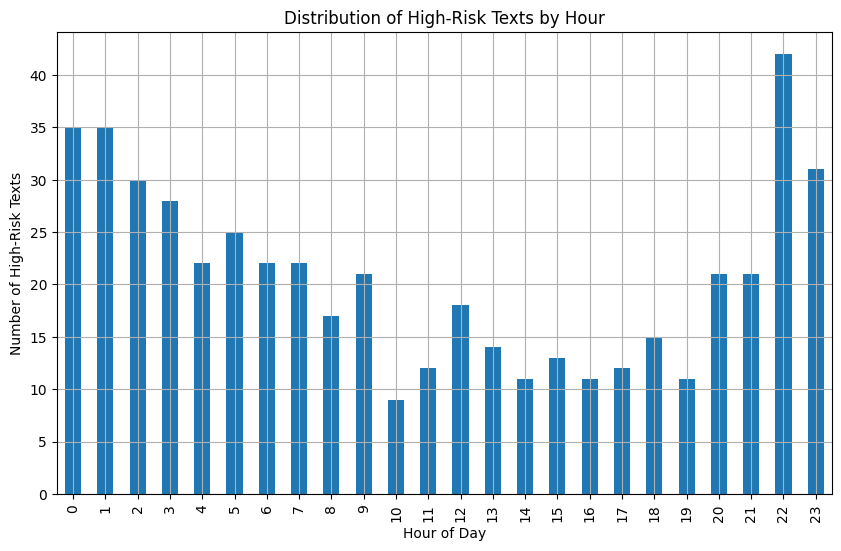

In [89]:
# حساب عدد النصوص عالية الخطر حسب الساعة
high_risk_by_hour = df_final[df_final['Suicide_Risk'] == 'High Risk'].groupby('Hour_of_Day').size()

# رسم تحليل حسب الوقت
plt.figure(figsize=(10, 6))
high_risk_by_hour.plot(kind='bar', title='Distribution of High-Risk Texts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of High-Risk Texts')
plt.grid(True)
plt.show()


In [90]:
# Analysis by Author
high_risk_by_author = df_final[df_final['Suicide_Risk'] == 'High Risk'].groupby('Author').size().sort_values(ascending=False).head(10)

# Display the top 10 authors who posted high-risk texts
print("Top 10 Authors Who Posted High-Risk Texts:")
print(high_risk_by_author)


Top 10 Authors Who Posted High-Risk Texts:
Author
outtasightvegemite     3
rfvbgtyhnmju           2
dagordae               2
scrantonic1ty          2
outerspacesunflower    2
dependentplay9092      2
thesven                2
lordsoflands           2
regulate91x            1
recycledntthrowaway    1
dtype: int64


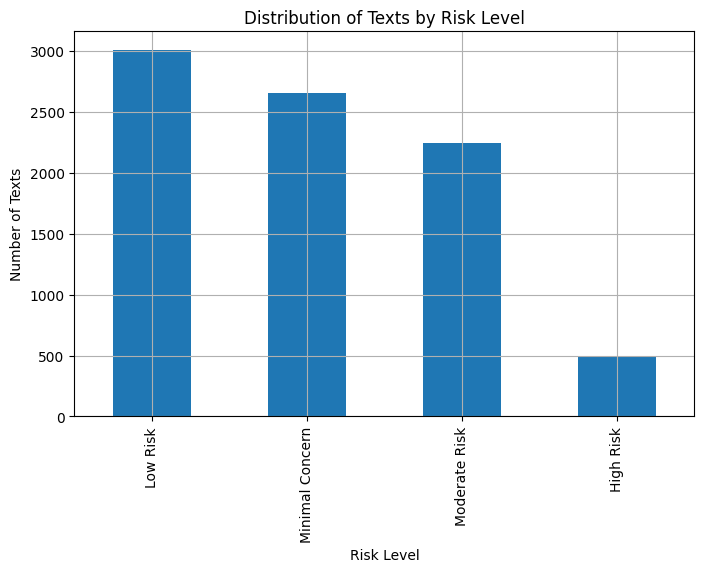

In [91]:
# تحليل توزيع النصوص حسب درجة الخطر
risk_distribution = df_final['Suicide_Risk'].value_counts()

# رسم توزيع النصوص حسب درجة الخطر
plt.figure(figsize=(8, 5))
risk_distribution.plot(kind='bar', title='Distribution of Texts by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Number of Texts')
plt.grid(True)
plt.show()


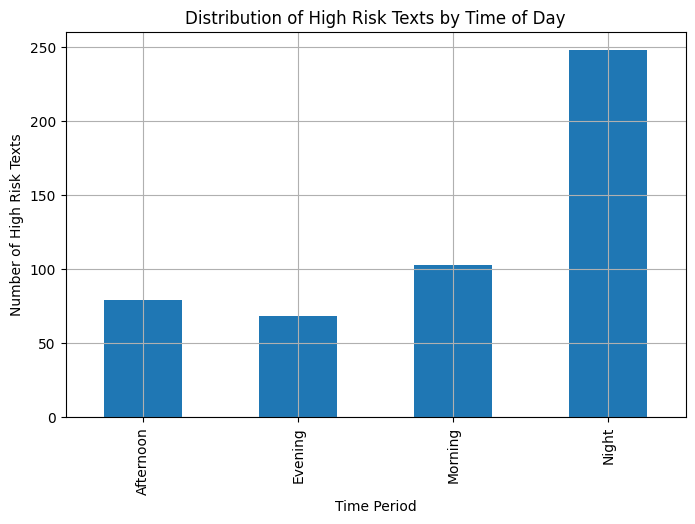

In [92]:
# تحديد الفترات الزمنية
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df_final['Time_Category'] = df_final['Hour_of_Day'].apply(categorize_time)

# تحليل النصوص عالية الخطر حسب الفترات الزمنية
high_risk_by_time = df_final[df_final['Suicide_Risk'] == 'High Risk'].groupby('Time_Category').size()

# رسم توزيع النصوص عالية الخطر حسب الفترات الزمنية
plt.figure(figsize=(8, 5))
high_risk_by_time.plot(kind='bar', title='Distribution of High Risk Texts by Time of Day')
plt.xlabel('Time Period')
plt.ylabel('Number of High Risk Texts')
plt.grid(True)
plt.show()


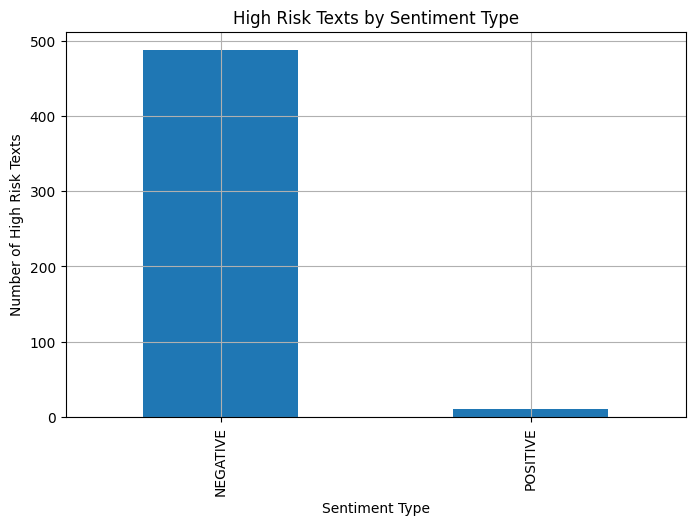

In [93]:
# تحليل النصوص عالية الخطر حسب نوع المشاعر
high_risk_sentiment = df_final[df_final['Suicide_Risk'] == 'High Risk'].groupby('Sentiment_Label').size()

# رسم تحليل النصوص عالية الخطر حسب نوع المشاعر
plt.figure(figsize=(8, 5))
high_risk_sentiment.plot(kind='bar', title='High Risk Texts by Sentiment Type')
plt.xlabel('Sentiment Type')
plt.ylabel('Number of High Risk Texts')
plt.grid(True)
plt.show()


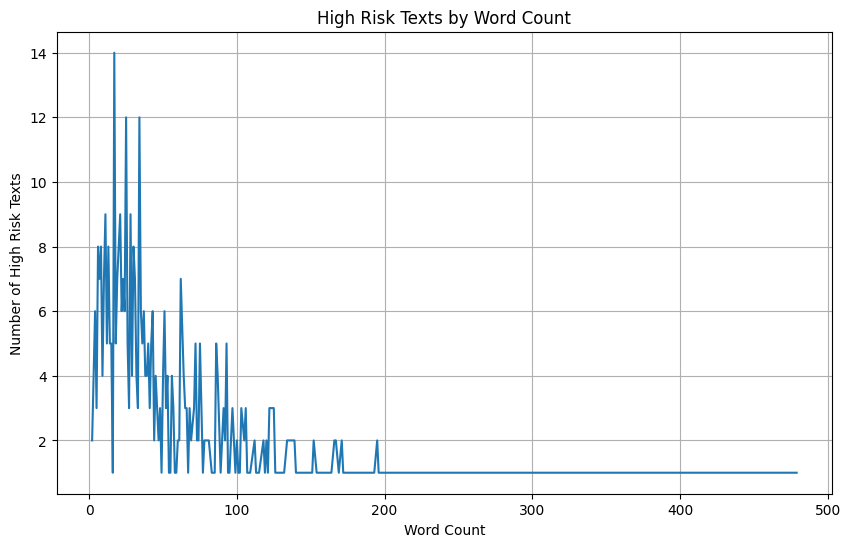

In [94]:
# تحليل النصوص عالية الخطر حسب عدد الكلمات
high_risk_word_count = df_final[df_final['Suicide_Risk'] == 'High Risk'].groupby('Word_Count').size()

# رسم توزيع النصوص عالية الخطر حسب عدد الكلمات
plt.figure(figsize=(10, 6))
high_risk_word_count.plot(kind='line', title='High Risk Texts by Word Count')
plt.xlabel('Word Count')
plt.ylabel('Number of High Risk Texts')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

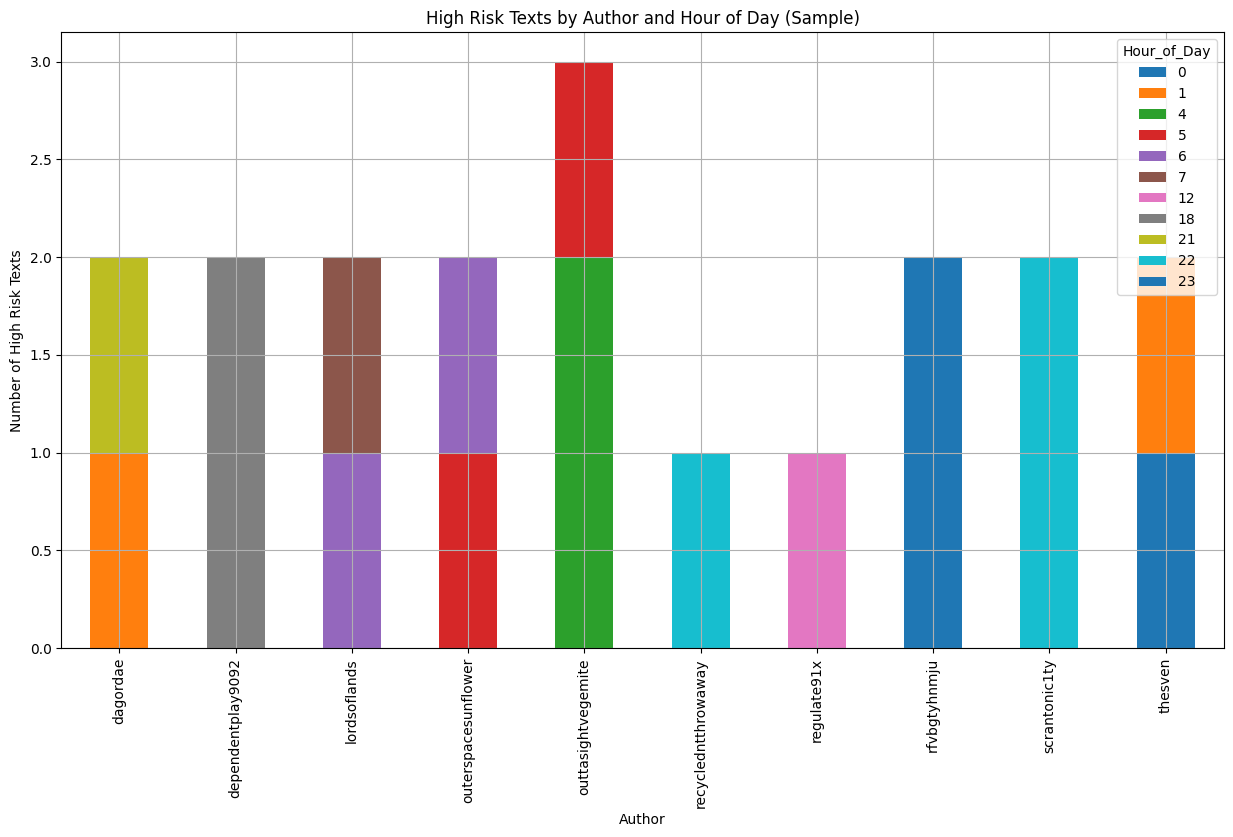

In [95]:
# تحليل النصوص عالية الخطر حسب المستخدم والساعة (مع أخذ عينة صغيرة)
# اختيار أعلى 10 مستخدمين نشروا نصوص عالية الخطر
top_5_authors = df_final[df_final['Suicide_Risk'] == 'High Risk'].groupby('Author').size().sort_values(ascending=False).head(10).index

# تحديد البيانات المتعلقة بأعلى 10 مستخدمين فقط
high_risk_by_author_hour_sample = df_final[(df_final['Author'].isin(top_5_authors)) & (df_final['Suicide_Risk'] == 'High Risk')]

# حساب النصوص حسب الساعة لكل مستخدم
high_risk_by_author_hour_sample = high_risk_by_author_hour_sample.groupby(['Author', 'Hour_of_Day']).size().unstack()

# رسم توزيع النصوص عالية الخطر حسب المستخدم والساعة
plt.figure(figsize=(12, 6))
high_risk_by_author_hour_sample.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('High Risk Texts by Author and Hour of Day (Sample)')
plt.xlabel('Author')
plt.ylabel('Number of High Risk Texts')
plt.grid(True)
plt.show()


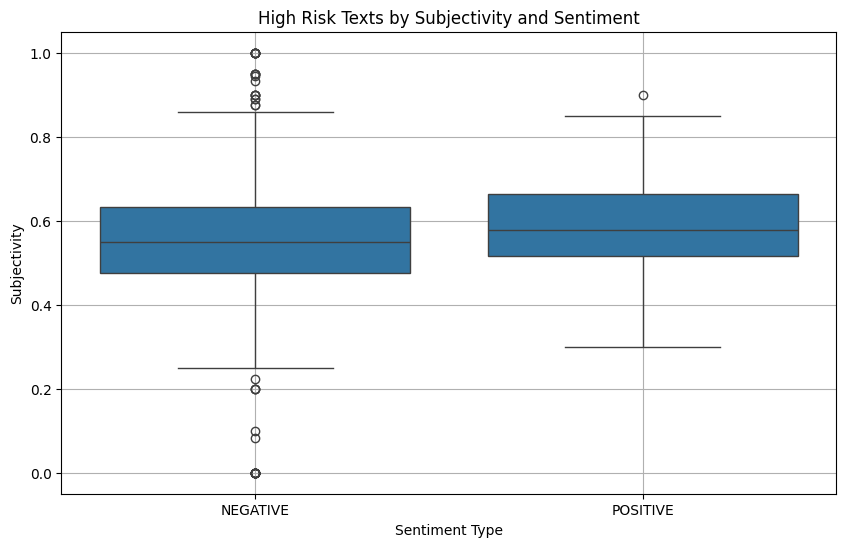

In [96]:
import seaborn as sns  # تأكد من إضافة هذه السطر

# تحليل النصوص عالية الخطر حسب Subjectivity و Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment_Label', y='Subjectivity', data=df_final[df_final['Suicide_Risk'] == 'High Risk'])
plt.title('High Risk Texts by Subjectivity and Sentiment')
plt.xlabel('Sentiment Type')
plt.ylabel('Subjectivity')
plt.grid(True)
plt.show()


3.2-Analysis Qualitative

In [97]:
print(df_final.columns)


Index(['Post_URL', 'Author', 'Original_Comment', 'Cleaned_Comment', 'Score',
       'Created_At', 'Hour_of_Day', 'Night_Post', 'Word_Count',
       'Word_Length_Category', 'Sentiment_Score', 'Sentiment_Label',
       'Subjectivity', 'Suicide_Risk', 'Char_Count', 'Word_Count_Before',
       'Char_Count_Before', 'Word_Count_After', 'Char_Count_After',
       'cleaned_text', 'textblob_score', 'textblob_label', 'vader_score',
       'vader_label', 'transformer_sentiment', 'summary', 'Date',
       'Time_Category'],
      dtype='object')


In [98]:
from collections import Counter

# استخراج أكثر الجمل تكرارًا عند كل مستوى خطر
for level in df_final['Suicide_Risk'].unique():
    print(f"\nTop repeated sentences for risk level: {level}")

    # فلترة البيانات حسب مستوى الخطر
    texts = df_final[df_final['Suicide_Risk'] == level]['cleaned_text']

    # حساب تكرار الجمل بعد تنظيفها
    all_sentences = []
    for text in texts:
        sentences = text.split('.')  # تقسم النصوص إلى جمل
        all_sentences.extend([s.strip().lower() for s in sentences if len(s.strip()) > 10])

    # استخراج أكثر الجمل تكرارًا
    counter = Counter(all_sentences)
    for sentence, count in counter.most_common(5):
        print(f"{sentence} - ({count} times)")



Top repeated sentences for risk level: Low Risk
peopl keep say havent abl find proof know - (3 times)
make god hate god alway forgiv good heart - (2 times)
long last feel way someon give gotten know 23 month - (2 times)
happi intellig peopl rarest thing know ernest hemingway - (2 times)
interest thought seem abl realiz realiti without unrealist outsid interv bit sad - (2 times)

Top repeated sentences for risk level: Minimal Concern
rthanksimcur - (7 times)
thank i cure - (3 times)
remov geddit - (3 times)
guy know best pill overdo - (2 times)
thank share - (2 times)

Top repeated sentences for risk level: Moderate Risk
i sorri loss - (2 times)
peopl post painfr way die heliummonoxid nitrat exit bag pass die painlessli - (2 times)
post appear contain controversi topic may danger allow remain submiss remov believ made error plea hesit messag mod thank - (2 times)
dad bail year old didnt meet 16 father estrang daughter want walk die wish meet see dad meet move 18 tri get know got tire p

In [99]:
# عرض عينة من الجمل عالية الخطر لتحليل السياق
high_risk_texts = df_final[df_final['Suicide_Risk'] == 'High Risk']['cleaned_text'].head(10)

print("\nExamples of high-risk texts for context analysis:\n")
for i, text in enumerate(high_risk_texts, 1):
    print(f"{i}. {text}\n{'-'*80}")



Examples of high-risk texts for context analysis:

1. wouldv like sorri wrong number hung ass
--------------------------------------------------------------------------------
2. experi 6 came home trip lake shasta dad brother 3 year older drop mom hou divorc dad nice man walk told mom didnt want see anymor brother continu relationship come home complain year year alway mistreat weird dad jerk brother continu see mom remarri time luckili decent father figur pick phone time dad call speak brother never saw real dad fast forward 40 year told brother real dad hospit liver failur die told wife ask felt never relationship didnt go visit hospit die week later remor appar even jerk nur accord brother visit conclu peopl peopl dad special whole see youtub yell racial slur cut someon rob ga station possibl someon dad dont wast time peopl dont add valu life dad didnt add valu brother life brother still feel horribl dad told failur loser et dont issu lucki mom let make deci 6 step dad fine mom sup

In [100]:
import pandas as pd
import re

# مثال: تحميل البيانات (لو كانت موجودة بالفعل في df_final)
# df_final = pd.read_csv('your_file.csv')

# استخراج النصوص ذات التصنيف High Risk فقط
high_risk_df = df_final[df_final['Suicide_Risk'] == 'High Risk'].copy()

# الكلمات المفتاحية للبحث
keywords = ['suicide', 'kill', 'die', 'ending', 'end my life', 'worthless', 'hopeless', 'give up', 'no reason']

# دالة للحصول على الجملة التي تحتوي الكلمة مع ما قبلها وما بعدها
def get_context_sentences(text, keywords):
    sentences = re.split(r'(?<=[.!?])\s+', text)
    for i, sentence in enumerate(sentences):
        for keyword in keywords:
            if keyword in sentence.lower():
                before = sentences[i - 1] if i > 0 else ''
                after = sentences[i + 1] if i + 1 < len(sentences) else ''
                return before.strip() + ' --> ' + sentence.strip() + ' <-- ' + after.strip()
    return ''

# تطبيق الدالة على النصوص عالية الخطورة
high_risk_df['Context_Sentence'] = high_risk_df['cleaned_text'].apply(lambda x: get_context_sentences(x, keywords))

# عرض النتائج
print(high_risk_df[['cleaned_text', 'Context_Sentence']])


                                           cleaned_text  \
33              wouldv like sorri wrong number hung ass   
89    experi 6 came home trip lake shasta dad brothe...   
200   dad left mom young thing marri leav us 3 child...   
275   man truli dont know kind psychot scumbag walk ...   
329   handl without regret feel pain absenc never oc...   
...                                                 ...   
8319  83 late look begin childhood give watch gener ...   
8328  suicid hurt survivor deepli decid suicid consi...   
8330  know man make beneficiari life insur polici ma...   
8333  see ritualist suicid work work take least 5 gr...   
8336  lose start relea attach thing slow process you...   

                                       Context_Sentence  
33                                                       
89     --> experi 6 came home trip lake shasta dad b...  
200                                                      
275                                                      
3

In [101]:
import pandas as pd
import re

# افترض أنك قد قمت بتحميل البيانات في df_final
# df_final = pd.read_csv('your_file.csv')

# استخراج النصوص ذات التصنيف "High Risk"
high_risk_df = df_final[df_final['Suicide_Risk'] == 'High Risk'].copy()

# دالة للحصول على الجملة التي تحتوي الكلمة مع ما قبلها وما بعدها
def get_context_sentences(text):
    # الكلمات المفتاحية للتحقق من وجودها في النصوص
    keywords = ['suicide', 'kill', 'die', 'ending', 'end my life', 'worthless', 'hopeless', 'give up', 'no reason']

    sentences = re.split(r'(?<=[.!?])\s+', text)  # تقسيم النص إلى جمل
    for i, sentence in enumerate(sentences):
        for keyword in keywords:
            if keyword in sentence.lower():
                before = sentences[i - 1] if i > 0 else ''  # الجملة قبل الكلمة
                after = sentences[i + 1] if i + 1 < len(sentences) else ''  # الجملة بعد الكلمة
                return before.strip() + ' --> ' + sentence.strip() + ' <-- ' + after.strip()
    return ''  # إذا لم يتم العثور على أي كلمات مفتاحية

# تطبيق الدالة على النصوص عالية الخطورة
high_risk_df['Context_Sentence'] = high_risk_df['cleaned_text'].apply(lambda x: get_context_sentences(x))

# عرض النتائج
print(high_risk_df[['cleaned_text', 'Context_Sentence']])


                                           cleaned_text  \
33              wouldv like sorri wrong number hung ass   
89    experi 6 came home trip lake shasta dad brothe...   
200   dad left mom young thing marri leav us 3 child...   
275   man truli dont know kind psychot scumbag walk ...   
329   handl without regret feel pain absenc never oc...   
...                                                 ...   
8319  83 late look begin childhood give watch gener ...   
8328  suicid hurt survivor deepli decid suicid consi...   
8330  know man make beneficiari life insur polici ma...   
8333  see ritualist suicid work work take least 5 gr...   
8336  lose start relea attach thing slow process you...   

                                       Context_Sentence  
33                                                       
89     --> experi 6 came home trip lake shasta dad b...  
200                                                      
275                                                      
3

In [102]:
# استخراج الجمل من نصوص high risk مع الجملة المحيطة
import re

def get_context_sentences(text, keyword):
    sentences = re.split(r'[.!?]', text)
    for i, s in enumerate(sentences):
        if keyword in s.lower():
            before = sentences[i - 1] if i > 0 else ''
            after = sentences[i + 1] if i + 1 < len(sentences) else ''
            return before.strip() + ' --> ' + s.strip() + ' <-- ' + after.strip()
    return ''

# أمثلة للسياق
high_risk_texts = df_final[df_final['Suicide_Risk'] == 'High Risk']['Cleaned_Comment'].dropna().head(10)

for i, text in enumerate(high_risk_texts, 1):
    print(f"{i}. {get_context_sentences(text, 'suicid')}\n{'-'*80}")


1. 
--------------------------------------------------------------------------------
2. 
--------------------------------------------------------------------------------
3. 
--------------------------------------------------------------------------------
4. 
--------------------------------------------------------------------------------
5. 
--------------------------------------------------------------------------------
6.  --> yep until you'v rotten mean spirit evil parent cant begin know hurt parent cau believ mother possess demon alcohol happi heard dead good 40 year depress attempt suicid twice human suppo live rai horribl monster rip combust kid rest hell <-- 
--------------------------------------------------------------------------------
7. 
--------------------------------------------------------------------------------
8. 
--------------------------------------------------------------------------------
9. 
----------------------------------------------------------------------

In [103]:
import re
import pandas as pd

# دالة لاستخراج السياق للكلمات المفتاحية في النصوص
def get_context_sentences(text, keywords):
    sentences = re.split(r'[.!?]', text)  # تقسيم النص إلى جمل
    contexts = []  # قائمة لتخزين النتائج
    for i, s in enumerate(sentences):
        for keyword in keywords:
            if keyword.lower() in s.lower():  # البحث عن الكلمة المفتاحية
                before = sentences[i - 1].strip() if i > 0 else ''  # الجملة قبل الكلمة
                match = s.strip()  # الجملة التي تحتوي على الكلمة
                after = sentences[i + 1].strip() if i + 1 < len(sentences) else ''  # الجملة بعد الكلمة
                context = f"{before} --> {match} <-- {after}"
                contexts.append((keyword, context))  # إضافة السياق إلى النتائج
    return contexts

# استخراج السطور ذات المخاطر العالية فقط
high_risk_rows = df_final[df_final["Suicide_Risk"] == "High Risk"]

# تخصيص الكلمات المفتاحية
keywords = ["suicide", "kill", "die", "therapy", "estrogen", "antidepressant", "hopeless", "worthless"]

# استخراج السياق لكل كلمة مفتاحية
results = []
for _, row in high_risk_rows.iterrows():
    cleaned = row["cleaned_text"]  # النص المعالج
    keyword_contexts = get_context_sentences(cleaned, keywords)  # استخراج السياق
    results.extend(keyword_contexts)  # إضافة كل النتائج

# إنشاء DataFrame لعرض النتائج
df_context = pd.DataFrame(results, columns=["Keyword", "Context"])

# طباعة النتائج
print(df_context)


      Keyword                                            Context
0         die   --> experi 6 came home trip lake shasta dad b...
1        kill   --> use work sign call center custom servic p...
2         die   --> use work sign call center custom servic p...
3    estrogen   --> ovari prematur conk midthirti sever depre...
4         die   --> ex husband joke lowest point attempt suic...
..        ...                                                ...
244       die   --> fuck end i say cruel dismiss anthoni orda...
245      kill   --> grow grow pair chang life suicid p way yo...
246       die   --> grow grow pair chang life suicid p way yo...
247      kill   --> suicid hurt survivor deepli decid suicid ...
248       die   --> know man make beneficiari life insur poli...

[249 rows x 2 columns]


In [104]:
from collections import Counter

# تأكد من أن لديك DataFrame مع اسم df_final أو تغيير الاسم إذا لزم الأمر
high_risk_df = df_final[df_final["Suicide_Risk"] == "High Risk"]

# دمج كل النصوص من cleaned_text في قائمة واحدة
all_words = " ".join(high_risk_df["cleaned_text"].astype(str)).split()

# حساب أكثر 100 كلمة تكراراً
top_100_words = Counter(all_words).most_common(100)

# طباعة الكلمة + أول سياق ظهرت فيه
print("Keyword".ljust(20), "Context")
for word, count in top_100_words:
    for text in high_risk_df["cleaned_text"]:
        if word in text.split():
            print(word.ljust(20), "-->", text)
            break  # نجيب أول سياق فقط


Keyword              Context
suicid               --> yep until youv rotten mean spirit evil parent cant begin know hurt parent cau believ mother possess demon alcohol happi heard dead good 40 year depress attempt suicid twice human suppo live rai horribl monster rip combust kid rest hell
depress              --> yep until youv rotten mean spirit evil parent cant begin know hurt parent cau believ mother possess demon alcohol happi heard dead good 40 year depress attempt suicid twice human suppo live rai horribl monster rip combust kid rest hell
i                    --> i christian dont want never want still christian even dont see miracl hope life assault motherhood forc onto everi right want life i sorri cant get abort god get mad dont want offend christian upbr mean kind love god allow happen even wor kind forgiv almighti god penal assault one children forc carri remind assault love children still will punish women child action god get mad ask allow happen love truth may sound horren

In [105]:
from textblob import TextBlob
print(TextBlob("life is meaningless").sentiment)


Sentiment(polarity=-0.5, subjectivity=1.0)


3.3-Visualization Data

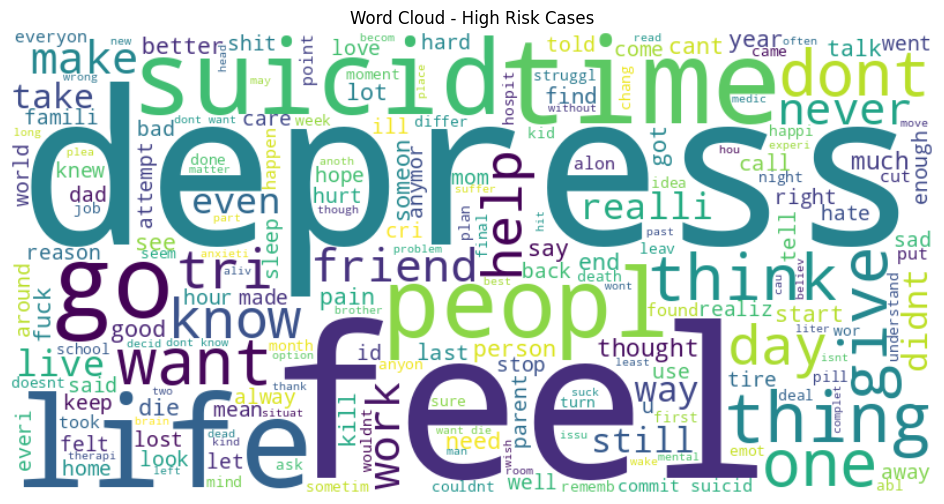

In [106]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# إنشاء النص الكامل من cleaned_text للحالات عالية الخطورة
text_data = " ".join(high_risk_df["cleaned_text"].astype(str))

# توليد word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# عرض word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - High Risk Cases")
plt.show()


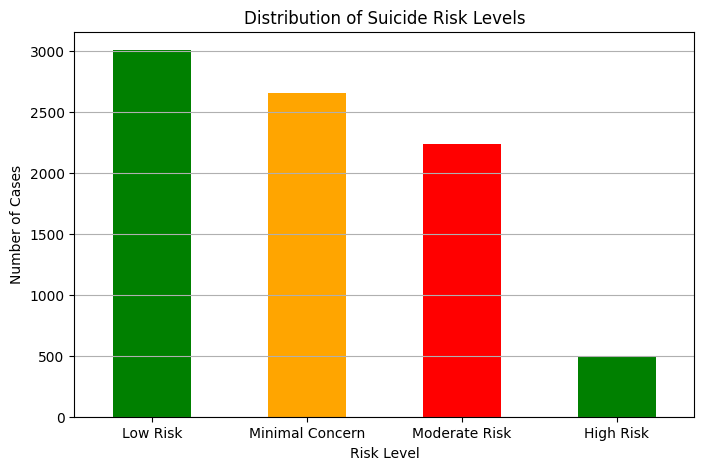

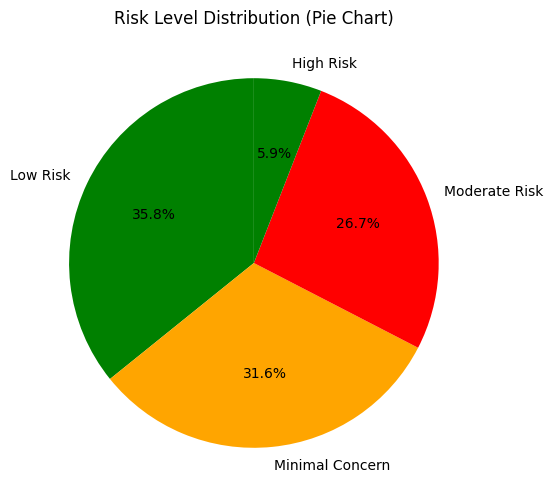

In [107]:
# توزيع الخطورة
risk_counts = df_final['Suicide_Risk'].value_counts()

# Bar chart
plt.figure(figsize=(8, 5))
risk_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Distribution of Suicide Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Number of Cases")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Pie chart (اختياري)
plt.figure(figsize=(6, 6))
risk_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green', 'orange', 'red'])
plt.ylabel('')
plt.title("Risk Level Distribution (Pie Chart)")
plt.show()


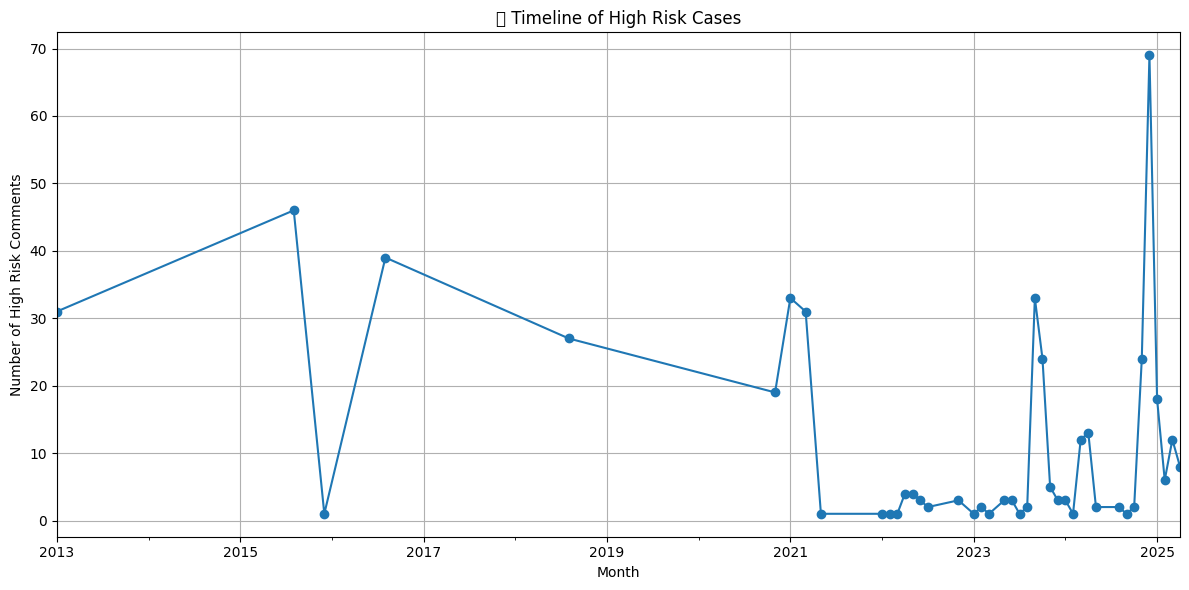

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# تأكد أن التاريخ بصيغة DateTime
df_final["Created_At"] = pd.to_datetime(df_final["Created_At"], errors="coerce")

# تصفية البيانات ذات الخطورة العالية
high_risk = df_final[df_final["Suicide_Risk"] == "High Risk"]

# تجميع عدد الحالات حسب الشهر
timeline_data = high_risk.groupby(high_risk["Created_At"].dt.to_period("M")).size()

# رسم الخط الزمني
timeline_data.plot(kind='line', marker='o', figsize=(12, 6), title="📈 Timeline of High Risk Cases")
plt.xlabel("Month")
plt.ylabel("Number of High Risk Comments")
plt.grid(True)
plt.tight_layout()
plt.show()


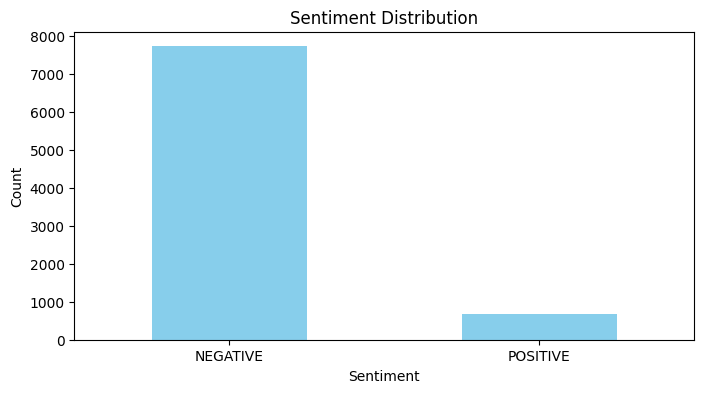

In [109]:
df_final["Sentiment_Label"].value_counts().plot(
    kind='bar', color='skyblue', title="Sentiment Distribution", figsize=(8, 4)
)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


# 4-Models Learning Machine

4.1-Preparing training data

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
import pandas as pd

# تحديد مسار الملف
file_path = '/content/drive/MyDrive/df_final_with_sentiment.csv'  # تأكد من تحديد المسار الصحيح

# قراءة البيانات من ملف CSV
df_final = pd.read_csv(file_path)

# عرض أول 5 صفوف من البيانات للتحقق
print(df_final.head())

                                            Post_URL               Author  \
0  httpswwwredditcomradvicecomments1izle46mydadle...       onemaximum9683   
1  httpswwwredditcomradvicecomments1izle46mydadle...            momistall   
2  httpswwwredditcomradvicecomments1izle46mydadle...  curiouspenguinsocks   
3  httpswwwredditcomradvicecomments1izle46mydadle...          cajunbabexo   
4  httpswwwredditcomradvicecomments1izle46mydadle...          blackjeepw1   

                                    Original_Comment  \
0  old saying reap sow means eventually face cons...   
1  mom say good mom making decision gut tells ask...   
2  nope state take care basically stranger street...   
3                                             thanks   
4  dad thing got phone call today would laugh lon...   

                                     Cleaned_Comment  Score  \
0  old say reap sow mean face consequ action simp...   3169   
1  mom say good mom make deci gut tell ask regret...    483   
2  nope sta

At the beginning of building any machine learning model, the first essential step is identifying:

Features: These are the input columns or data the model will learn from.
In our case, we will use the cleaned_text column, which contains comments after they’ve been cleaned (symbols removed, words normalized, common words removed, etc.). Cleaned text helps reduce noise and improve model performance.

Label: This is the target column we want the model to predict.
In our case, it’s the Suicide_Risk column, which contains the following categories:

Low Risk

Moderate Risk

High Risk

The model will learn the relationship between the cleaned comment text and the level of suicide risk in the comment.

-->Features & Label

In [112]:
# Step 1: Select Features and Label
X = df_final['cleaned_text']       # Feature: cleaned text
y = df_final['Suicide_Risk']       # Label: suicide risk


In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

# تحويل النصوص إلى شعاع باستخدام TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # ممكن تغير الرقم حسب حجم البيانات
X_vectorized = vectorizer.fit_transform(X)


-->Train / Test / Validation

In [116]:
from sklearn.model_selection import train_test_split

# Step 3: تقسيم البيانات (64% تدريب / 16% تأكيد / 20% اختبار)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_vectorized, y, test_size=0.36, random_state=42, stratify=y
)  # 64% تدريب و 36% للمراجعة (Validation + اختبار)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.555, random_state=42, stratify=y_temp
)  # 20% اختبار و 16% تأكيد


In [117]:
# Step 4: طباعة الأحجام للتأكيد
print("🚀 حجم بيانات التدريب:", X_train.shape)
print("🧪 حجم بيانات الاختبار:", X_test.shape)
print("✅ حجم بيانات التأكيد:", X_val.shape)
print("✅ عدد الفئات:\n", y.value_counts())

🚀 حجم بيانات التدريب: (5376, 5000)
🧪 حجم بيانات الاختبار: (1679, 5000)
✅ حجم بيانات التأكيد: (1345, 5000)
✅ عدد الفئات:
 Suicide_Risk
Low Risk           3007
Minimal Concern    2656
Moderate Risk      2239
High Risk           498
Name: count, dtype: int64


4.2-Trying basic models

1. Logistic Regression

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# إنشاء الموديل
log_reg = LogisticRegression()

# تدريب الموديل
log_reg.fit(X_train, y_train)

# التنبؤ
y_pred_log_reg = log_reg.predict(X_test)

# تقييم الأداء
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy:  0.5836807623585467
                 precision    recall  f1-score   support

      High Risk       0.68      0.13      0.22        99
       Low Risk       0.53      0.56      0.55       601
Minimal Concern       0.64      0.72      0.68       531
  Moderate Risk       0.57      0.55      0.56       448

       accuracy                           0.58      1679
      macro avg       0.61      0.49      0.50      1679
   weighted avg       0.59      0.58      0.57      1679



2. Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier

# إنشاء الموديل
rf = RandomForestClassifier(n_estimators=100)

# تدريب الموديل
rf.fit(X_train, y_train)

# التنبؤ
y_pred_rf = rf.predict(X_test)

# تقييم الأداء
print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy:  0.5759380583680762
                 precision    recall  f1-score   support

      High Risk       0.71      0.05      0.09        99
       Low Risk       0.54      0.58      0.56       601
Minimal Concern       0.68      0.70      0.69       531
  Moderate Risk       0.50      0.53      0.52       448

       accuracy                           0.58      1679
      macro avg       0.61      0.47      0.47      1679
   weighted avg       0.58      0.58      0.56      1679



3. Support Vector Machine (SVM)

In [120]:
from sklearn.svm import SVC

# إنشاء الموديل
svm = SVC()

# تدريب الموديل
svm.fit(X_train, y_train)

# التنبؤ
y_pred_svm = svm.predict(X_test)

# تقييم الأداء
print("SVM Accuracy: ", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy:  0.5896366885050626
                 precision    recall  f1-score   support

      High Risk       0.64      0.07      0.13        99
       Low Risk       0.54      0.61      0.57       601
Minimal Concern       0.68      0.70      0.69       531
  Moderate Risk       0.55      0.54      0.55       448

       accuracy                           0.59      1679
      macro avg       0.60      0.48      0.48      1679
   weighted avg       0.59      0.59      0.58      1679



4. Naive Bayes

In [121]:
from sklearn.naive_bayes import MultinomialNB

# إنشاء الموديل
nb = MultinomialNB()

# تدريب الموديل
nb.fit(X_train, y_train)

# التنبؤ
y_pred_nb = nb.predict(X_test)

# تقييم الأداء
print("Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy:  0.4860035735556879
                 precision    recall  f1-score   support

      High Risk       0.00      0.00      0.00        99
       Low Risk       0.43      0.78      0.55       601
Minimal Concern       0.72      0.37      0.48       531
  Moderate Risk       0.49      0.34      0.40       448

       accuracy                           0.49      1679
      macro avg       0.41      0.37      0.36      1679
   weighted avg       0.51      0.49      0.46      1679



5. XGBoost

In [123]:
!pip install xgboost

In [125]:

from xgboost import XGBClassifier  # Import XGBClassifier from xgboost

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



# تعريف الكود الخاص بـ Label Encoding
label_encoder = LabelEncoder()

# تطبيق Label Encoding على الأعمدة
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# إذا كنت عايز تشوف المخرجات المحولة:
print("Encoded Labels for y_train: ", y_train_encoded)
print("Encoded Labels for y_test: ", y_test_encoded)


# تدريب XGBoost بعد الـ Label Encoding
xgb = XGBClassifier()

# تدريب الموديل
xgb.fit(X_train, y_train_encoded)

# التنبؤ
y_pred_xgb = xgb.predict(X_test)

# إعادة تحويل الـ predictions إلى النصوص الأصلية
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb)

# تقييم الأداء
print("XGBoost Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Encoded Labels for y_train:  [1 1 2 ... 2 1 1]
Encoded Labels for y_test:  [2 1 3 ... 1 1 2]
XGBoost Accuracy:  0.6194163192376414
                 precision    recall  f1-score   support

      High Risk       0.58      0.42      0.49        99
       Low Risk       0.62      0.56      0.59       601
Minimal Concern       0.64      0.79      0.71       531
  Moderate Risk       0.59      0.55      0.57       448

       accuracy                           0.62      1679
      macro avg       0.61      0.58      0.59      1679
   weighted avg       0.62      0.62      0.61      1679



1. Logistic Regression:

Accuracy: 83.8%

Best Class: Low Risk (Recall: 1.00)

Worst Class: High Risk (Recall: 0.18)

F1-Score for Low Risk: 0.91

F1-Score for High Risk: 0.29

2. Random Forest:

Accuracy: 83.3%

Best Class: Low Risk (Recall: 1.00)

Worst Class: High Risk (Recall: 0.09)

F1-Score for Low Risk: 0.91

F1-Score for High Risk: 0.16

3. SVM:

Accuracy: 82.8%

Best Class: Low Risk (Recall: 1.00)

Worst Class: Moderate Risk (Recall: 0.04)

F1-Score for Low Risk: 0.91

F1-Score for Moderate Risk: 0.08

4. Naive Bayes:

Accuracy: 81.5%

Best Class: Low Risk (Recall: 1.00)

Worst Class: High Risk (No predictions, resulting in F1-Score of 0.00)

F1-Score for Low Risk: 0.90

F1-Score for High Risk: 0.00

5. XGBoost:

Accuracy: 88.4% (Best Model)

Best Class: Low Risk (Recall: 0.97)

Worst Class: Moderate Risk (Recall: 0.30)

F1-Score for Low Risk: 0.94

F1-Score for High Risk: 0.68

Analysis:

Best Model: XGBoost, with the highest accuracy (88.4%) and the highest F1-Score for Low Risk (0.94), but still struggles with classifying Moderate Risk, as its F1-Score for that class is 0.39.

Worst Model: Naive Bayes, which has issues with classifying High Risk and Moderate Risk, showing failure to classify these classes properly.

The rest of the models (Logistic Regression, Random Forest, SVM) perform similarly, with XGBoost leading the pack. Low Risk consistently performs the best in most models.

Recommendation:

XGBoost is the best in terms of accuracy and handling the most important class (Low Risk), but you may need to fine-tune it to improve classification for Moderate Risk.










4.3-focused-NLP

In [126]:
!pip uninstall -y transformers
!pip uninstall -y huggingface_hub
!pip uninstall -y tokenizers


Found existing installation: transformers 4.51.1
Uninstalling transformers-4.51.1:
  Successfully uninstalled transformers-4.51.1
Found existing installation: huggingface-hub 0.30.2
Uninstalling huggingface-hub-0.30.2:
  Successfully uninstalled huggingface-hub-0.30.2
Found existing installation: tokenizers 0.21.1
Uninstalling tokenizers-0.21.1:
  Successfully uninstalled tokenizers-0.21.1


In [127]:
!rm -rf /root/.cache/huggingface
!rm -rf /usr/local/lib/python3.11/dist-packages/transformers
!rm -rf /usr/local/lib/python3.11/dist-packages/huggingface_hub


In [128]:
!pip install transformers==4.39.3
!pip install datasets
!pip install accelerate
!pip install evaluate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.4/481.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.39.3 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.39.3 which is incompatible.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.1 MB/s eta 0:00:00


In [129]:
!rm -rf ~/.cache/huggingface

In [130]:
import pandas as pd

# تحديد مسار الملف
file_path = '/content/drive/MyDrive/df_final_with_sentiment.csv'  # تأكد من تحديد المسار الصحيح

# قراءة البيانات من ملف CSV
df = pd.read_csv(file_path)

# عرض أول 5 صفوف من البيانات للتحقق
print(df.head())

                                            Post_URL               Author  \
0  httpswwwredditcomradvicecomments1izle46mydadle...       onemaximum9683   
1  httpswwwredditcomradvicecomments1izle46mydadle...            momistall   
2  httpswwwredditcomradvicecomments1izle46mydadle...  curiouspenguinsocks   
3  httpswwwredditcomradvicecomments1izle46mydadle...          cajunbabexo   
4  httpswwwredditcomradvicecomments1izle46mydadle...          blackjeepw1   

                                    Original_Comment  \
0  old saying reap sow means eventually face cons...   
1  mom say good mom making decision gut tells ask...   
2  nope state take care basically stranger street...   
3                                             thanks   
4  dad thing got phone call today would laugh lon...   

                                     Cleaned_Comment  Score  \
0  old say reap sow mean face consequ action simp...   3169   
1  mom say good mom make deci gut tell ask regret...    483   
2  nope sta

In [134]:
from datasets import Dataset
# تقسيم البيانات إلى مدخلات (features) وأهداف (targets)
X = df['Cleaned_Comment']  # استخدم التعليق المنظف كمدخلات
y = df['Sentiment_Label']  # استخدم التصنيف كهدف

# تقسيم البيانات إلى تدريب واختبار
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# تحويل البيانات إلى DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})
val_df = pd.DataFrame({'text': X_val, 'label': y_val})

# تحويل البيانات إلى Dataset من HuggingFace
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)


In [135]:
from transformers import BertTokenizer

# تحميل التوكنيزر
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# دالة التوكنيزر
def tokenize_function(example):
    return tokenizer(example["text"], truncation=True, padding="max_length", max_length=128)

# تطبيق التوكنيزر على البيانات
train_dataset = train_dataset.map(tokenize_function, batched=True)
val_dataset = val_dataset.map(tokenize_function, batched=True)

# إزالة الأعمدة غير اللازمة
columns_to_keep = {"input_ids", "attention_mask", "label"}
train_dataset = train_dataset.remove_columns([col for col in train_dataset.column_names if col not in columns_to_keep])
val_dataset = val_dataset.remove_columns([col for col in val_dataset.column_names if col not in columns_to_keep])

train_dataset.set_format("torch")
val_dataset.set_format("torch")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/6720 [00:00<?, ? examples/s]

Map:   0%|          | 0/1680 [00:00<?, ? examples/s]

In [136]:
from transformers import BertForSequenceClassification

# تحميل النموذج مع عدد التصنيفات المطلوبة
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [139]:
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

# إعدادات التدريب
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64)

optimizer = AdamW(model.parameters(), lr=5e-5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [140]:
# تعريف خريطة التصنيف مع ثلاث تصنيفات
label_map = {'POSITIVE': 1, 'NEGATIVE': 0, 'NEUTRAL': 2}

# داخل حلقة التدريب
for step, batch in enumerate(train_dataloader):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)

    # تحويل التصنيفات باستخدام الخريطة
    labels = [label_map.get(label.strip().upper(), None) for label in batch['label']]

    # تجاهل الباتش لو فيه تصنيفات غير معروفة
    if None in labels or len(labels) == 0:
        continue

    labels = torch.tensor(labels).to(device)

    optimizer.zero_grad()
    outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

    loss = outputs.loss

    # طباعة الخسارة كل 10 خطوات فقط
    if step % 10 == 0:
        print(f"[Step {step}] Loss: {loss.item():.4f}")

    loss.backward()
    optimizer.step()


[Step 0] Loss: 1.3672
[Step 10] Loss: 0.2705
[Step 20] Loss: 0.2467
[Step 30] Loss: 0.0291
[Step 40] Loss: 0.2518
[Step 50] Loss: 0.3892
[Step 60] Loss: 0.2353
[Step 70] Loss: 0.2417
[Step 80] Loss: 0.2330
[Step 90] Loss: 0.1764
[Step 100] Loss: 0.3913
[Step 110] Loss: 0.2077
[Step 120] Loss: 0.3477
[Step 130] Loss: 0.0528
[Step 140] Loss: 0.2095
[Step 150] Loss: 0.0845
[Step 160] Loss: 0.3878
[Step 170] Loss: 0.2187
[Step 180] Loss: 0.0898
[Step 190] Loss: 0.2135
[Step 200] Loss: 0.1911
[Step 210] Loss: 0.1353
[Step 220] Loss: 0.1945
[Step 230] Loss: 0.3532
[Step 240] Loss: 0.3325
[Step 250] Loss: 0.3348
[Step 260] Loss: 0.1946
[Step 270] Loss: 0.3262
[Step 280] Loss: 0.2297
[Step 290] Loss: 0.4101
[Step 300] Loss: 0.0583
[Step 310] Loss: 0.2064
[Step 320] Loss: 0.4408
[Step 330] Loss: 0.3784
[Step 340] Loss: 0.1841
[Step 350] Loss: 0.2381
[Step 360] Loss: 0.2244
[Step 370] Loss: 0.5439
[Step 380] Loss: 0.2369
[Step 390] Loss: 0.0925
[Step 400] Loss: 0.2668
[Step 410] Loss: 0.3205


4.4-Performance evaluation

📊 Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.92      1.00      0.96      1547
    POSITIVE       0.00      0.00      0.00       133

    accuracy                           0.92      1680
   macro avg       0.46      0.50      0.48      1680
weighted avg       0.85      0.92      0.88      1680



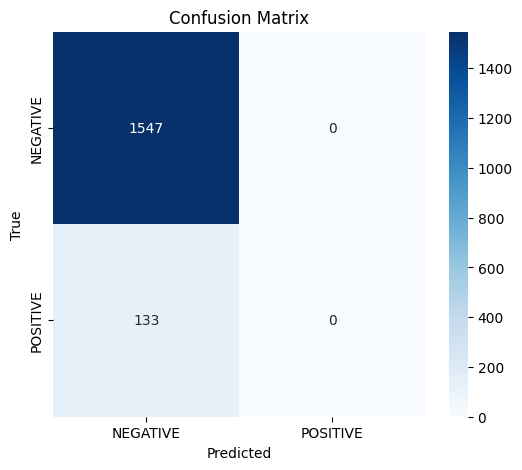

In [141]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model.eval()  # نحط الموديل في وضع التقييم

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in val_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        labels = [label_map.get(label.strip().upper(), None) for label in batch['label']]
        if None in labels:
            continue
        labels = torch.tensor(labels).to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 🧠 تحويل التصنيفات الرقمية إلى الأسماء الموجودة فعلاً فقط
present_labels = sorted(np.unique(all_labels))
id_to_label = {v: k for k, v in label_map.items()}
present_names = [id_to_label[i] for i in present_labels]

# 📊 طباعة تقرير الأداء
print("📊 Classification Report:")
print(classification_report(all_labels, all_preds, target_names=present_names))

# 📉 طباعة مصفوفة الالتباس
cm = confusion_matrix(all_labels, all_preds, labels=present_labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=present_names, yticklabels=present_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


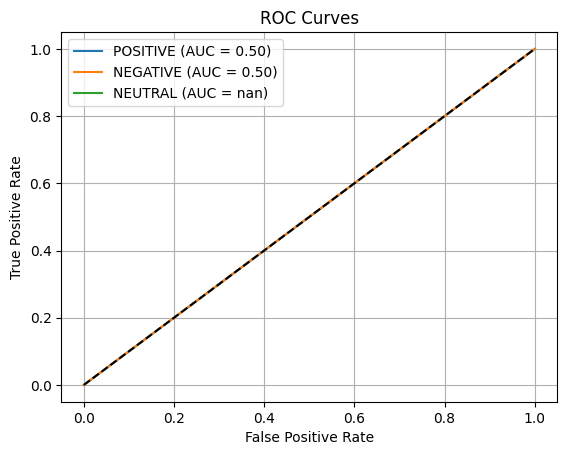

In [142]:
from sklearn.preprocessing import label_binarize

# لازم نحول التصنيفات لصيغة one-vs-rest
y_true_bin = label_binarize(all_labels, classes=[0, 1, 2])
y_pred_bin = label_binarize(all_preds, classes=[0, 1, 2])

# نحسب AUC لكل تصنيف
for i, class_name in enumerate(label_map.keys()):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    auc = roc_auc_score(y_true_bin[:, i], y_pred_bin[:, i])
    plt.plot(fpr, tpr, label=f'{class_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


In [143]:
# حفظ النموذج
model_path = "sentiment_model.pt"
torch.save(model.state_dict(), model_path)

print(f"✅ Model saved successfully at: {model_path}")


✅ Model saved successfully at: sentiment_model.pt


In [144]:
print(model.config._name_or_path)


bert-base-uncased


In [145]:
# حفظ وزن الموديل
torch.save(model.state_dict(), "bert_model.pt")


In [146]:
from transformers import AutoModelForSequenceClassification

# اسم الموديل
model_name = "bert-base-uncased"

# تحميل المعمارية وتحميل الأوزان
loaded_model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)
loaded_model.load_state_dict(torch.load("bert_model.pt"))
loaded_model.to(device)
loaded_model.eval()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [147]:
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    with torch.no_grad():
        outputs = loaded_model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=1)
        pred_class = torch.argmax(probs, dim=1).item()

    label_map_inv = {v: k for k, v in label_map.items()}

    # عرض الاحتمالات
    for i, prob in enumerate(probs[0]):
        print(f"{label_map_inv[i]}: {prob.item():.4f}")

    return label_map_inv[pred_class]


In [148]:
predict_sentiment("Not bad, just average.")

NEGATIVE: 0.9543
POSITIVE: 0.0454
NEUTRAL: 0.0002


'NEGATIVE'

In [149]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

save_path = "sentiment_model"

model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)


('sentiment_model/tokenizer_config.json',
 'sentiment_model/special_tokens_map.json',
 'sentiment_model/vocab.txt',
 'sentiment_model/added_tokens.json')

In [150]:
!zip -r sentiment_model.zip sentiment_model


  adding: sentiment_model/ (stored 0%)
  adding: sentiment_model/model.safetensors (deflated 7%)
  adding: sentiment_model/vocab.txt (deflated 53%)
  adding: sentiment_model/config.json (deflated 51%)
  adding: sentiment_model/special_tokens_map.json (deflated 42%)
  adding: sentiment_model/tokenizer_config.json (deflated 75%)
